## **Exploratory Analysis of Population Attributes Affecting Gun Capita**
#### By: Hayden Allison | 4/09/2023
#### Data Source: FBI's National Instant Criminal Background Check System
#### Highlights: Multivariate Charts, Feature Engineering, Normalized Data
#### Report Type: Discerete Quantitative, Retrospective Observational Study derived from cluster groups
#### Programming Method: Python Object-Oriented
#### Population: United States
#### Samples: Regionally clustered states & a state sample

<img src="C:\Users\tekre\Downloads\Analysis Projects\04092023_Firearms_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

## Introduction
A nation's pride is inherently associated to its quality-of-life progression for the residing population. General consensus on whether gun violence is superb or horrible, tends to favor a horrible ranking. However, due to an overwhelming desire for gun liberties, America falls far behind its first-world brothers & sisters. In order to solve this complex problem, examination of this data to impact of varying response variables is necessary. By the concluding section, evidence supporting relationships will be established. Breakdowns of each are showcased to determine the influence on registered firearm totals. The population is the United States population. Samples are contrived into cluster groups based on State then Region. Data sources are cleaned and explored for a transformed set of tabular models to enhance readability & analysis.

## Measures Analyzed of Samples & Population
1. Minimum & Maximum: Inspected to determine why minimums/maximums of response variables are populated. Crucial for detecting variance within tables & charts.
2. Mean: Provides evidence for trends. These trends are utilized for substantiating claims derived from included datasets. Allows concise charts to be created, as it eliminates the need for every value to be plotted of a category/series.
3. Median: Middle value for center highlights.
4. Mode: Densest value for center highlights.
5. Sum: Provides evidence for response variable totals. In the absence of summing those attributes, approximations would have to be relayed instead of exact data. 
6. Distributions: Density speaks volumns about patterns within a subset of data.
7. Quartiles: Quarter 1 & Quarter 3 are encoded to be discussed for an accurate analysis of distributions.
8. Standard Deviation: To dive deeper into understanding distributions.
9. Confidence Interval: Accuracy measurements.


## Research Questions: 
1. Does improved education outcomes impact registered firearm totals?
2. Are increased poverty levels affecting registered firearm totals?
3. Does region ethnicity groups differ vastly? How does this play into registered firearm count?
4. What's the yearly trend for total guns distributed in a region?
5. Is time progression, poverty, or education contributing most significantly to registered firearms per capita?

## Data Clean & Transformation of Data Sources
The "no-edit_gun-data-csv" file is queried to pull statistics on response variable. Unnecessary columns are eliminated to reduce data redundancy. Relative attributes include: month, state, permit, handgun, long_gun, other, multiple; they enable exploration into registered firearm amounts based on dates, with a quantative breakdown for firearm types. Month is transformed into a year and a month_digit attribute instead. Total_firearms is additionally created to display the summation of handgun, long_gun, other, and multiple. US Territories are included in Firearms data source but not Census; removal of territories is performed as a solution.

<img src="C:\Users\tekre\Downloads\Analysis Projects\04092023_Firearms_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import make_column_transformer as mct
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import set_config
import warnings
from matplotlib.font_manager import FontProperties

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

original_data = pd.read_csv('no-edit_gun-data-csv.csv')

# Filters out the additional attributes that are unneccesary in this analysis
def gun_data_transform(table):
    edit_table = table.iloc[:, :8]
    secondary_table = table.iloc[:, 12:15]
    final_table = pd.concat([edit_table, secondary_table], axis=1)
    final_table = final_table.drop(columns=['permit_recheck'])
    final_table['total_guns'] = final_table.loc[:, 'handgun':'redemption_other'].sum(axis=1)
    return final_table

# Converts month attribute into month_digit & year. Replaces NULLs with 0
def month_year_transform(table):
    months = table['month'].values
    split_values = np.array([item.split('-') for item in months])
    month_digits = split_values[:, 1]
    years = split_values[:, 0]
    table['month_digit'] = month_digits
    table['year'] = years
    after_drop = table.drop(columns='month')
    return after_drop.fillna(0)

# Reorganizes month_digit & year to the front, for enhanced readability
def table_join(new_table1):
    last_columns = new_table1.iloc[:, -2:]
    new_table = new_table1.iloc[:, :-2]
    new_table = pd.concat([last_columns, new_table], axis=1)
    return new_table

# Reduces data storage clutter through type-casting
def data_type_changes(table):
    for item in table.columns:
        if item != 'state' and item != 'month_digit':
            table[item] = table[item].astype(np.int16)
        elif item == 'month_digit':
            table[item] = table[item].astype(np.int8)
    return table

stage_table = gun_data_transform(original_data)    
date_transform_table = month_year_transform(stage_table)
columns_fix_table = table_join(date_transform_table)
final_table = data_type_changes(columns_fix_table)

# For relevancy, only years 2010 and onward are explored
firearms_table = final_table.query('(year >= 2010)').copy()
firearms_table

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,total_guns
0,9,2017,Alabama,16717,5734,6320,221,317,1378,1262,1,15233
1,9,2017,Alaska,209,2320,2930,219,160,200,154,2,5985
2,9,2017,Arizona,5069,11063,7946,920,631,1474,748,3,22785
3,9,2017,Arkansas,2935,4347,6063,165,366,1296,1824,4,14065
4,9,2017,California,-7697,-28371,24581,2984,0,535,397,5,131
...,...,...,...,...,...,...,...,...,...,...,...,...
5110,1,2010,Virginia,0,11513,10323,0,309,0,0,0,22145
5111,1,2010,Washington,6640,9348,8287,471,386,964,1068,7,20531
5112,1,2010,West Virginia,26,3735,4860,61,342,700,1951,0,11649
5113,1,2010,Wisconsin,0,4382,7950,153,7,9,224,6,12731


In [2]:
original_table = pd.read_csv('u.s.-census-data.csv')     

# Queries on Census data source to create a table relevant to research questions
def census_data_transform(table):
    edit_table = table.query(
        '(Fact == "Persons in poverty, percent") | '
        '(Fact == "Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015") | '
        '(Fact == "High school graduate or higher, percent of persons age 25 years+, 2011-2015")'
    )
    secondary_table = table.iloc[12:20]
    new_table = pd.concat([edit_table, secondary_table], ignore_index=True, axis=0)
    
# Removes an unnecessary Fact Note attribute
    new_table = new_table.drop(columns='Fact Note')
    return new_table

# Renames index for simpler referencing
def column_rename(table):
    labels = [
        'High school grads or higher', 'Bachelor\'s degree or higher', 'Poverty percent', 'White', 'African American', 
        'American Indian & Alaskan', 'Asian', 'Hawaiian & Pacific Islander', 'Two or more races', 'Hispanic', 
        'White, not Hispanic'
    ]
    table = table.drop(columns='Fact')
    table['Label'] = labels
    first_column = table['Label']
    other_columns = table.loc[:, 'Alabama':'Wyoming']
    reorderd_table = pd.concat([first_column, other_columns], axis=1)
    return reorderd_table

# Nearly all states have values presented as strings. This won't work well for statistical analysis
# Percentae_fix changes all percentages to a corresponsing decimal, formatted as whole numbers
# instead of decimals with leading 0's. 15% = .15
def percentage_fix(table):
    table_copy = table.copy()
    table_copy.replace('Z', 0, inplace=True)
    for col in table_copy.columns[1:]:
        if '%' in table_copy[col].iloc[0]:
            table_copy[col] = table_copy[col].str.rstrip('%').astype(float)/100
    return table_copy.fillna(0)
    
transform_table = census_data_transform(original_table)
census_table = percentage_fix(transform_table)
census_table = column_rename(census_table)
census_table.head(2)

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,High school grads or higher,0.843,0.921,0.860,0.848,0.818,0.907,0.899,0.884,0.869,...,0.909,0.855,0.819,0.912,0.918,0.883,0.904,0.850,0.910,0.923
1,Bachelor's degree or higher,0.235,0.280,0.275,0.211,0.314,0.381,0.376,0.300,0.273,...,0.27,0.249,0.276,0.311,0.360,0.363,0.329,0.192,0.278,0.257


In [3]:
# Firearms data source has US Territories (rogue_states) included. These are not represented in Census statistics
# Rogue_states are removed to minimze data redundancy
def rogue_states_removal(firearms, census):
    legitimate_states = list(census.columns) 
    firearms = firearms.query('state in @legitimate_states').reset_index().drop(columns='index')
    return firearms

# Rogue_state removal.
final_firearms = rogue_states_removal(firearms_table, census_table)

# Checks for existance of any rogue_states. Validated by return of 55
rogue_count = final_firearms['state'].value_counts().count()

# Checks for existance of any rogue_states. Invalidated by return of 50
rogue_states_check = final_firearms['state'].value_counts().count()

# States grouped into regions instead of ascending order
northeast_region = [
    # Northeast
    'Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts',
    'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'
]
midwest_region = [
    # Midwest
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan',
    'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'
]
south_region = [
    # South
    'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky',
    'Louisiana', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
    'Texas', 'Virginia', 'West Virginia'
]
west_region = [
    # West
    'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii',
    'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'
]

# Creates a new table for states in each region
def region_sort(table, region):
    table = table.query('state in @region')
    df_sorted = table.sort_values(by='state')
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

north_firearms = region_sort(final_firearms, northeast_region)
south_firearms = region_sort(final_firearms, south_region)
west_firearms = region_sort(final_firearms, west_region)
midwest_firearms = region_sort(final_firearms, midwest_region)

#### Aggregated dataframe initialized of final_firearms, additionally of regional samples from firearms population.

In [4]:
# Creating a substantially more responsive table for graphing operations compared to
# final_firearms table
attributes = final_firearms.iloc[:, 3:].columns
firearms_sum = final_firearms.groupby(['state', 'year'])[attributes].sum().reset_index()
firearms_mean = round(final_firearms.groupby(['state', 'year'])[attributes].mean().reset_index(), 2)

# Aggregating regions for region comparison in charts
def region_factory(region):
    att = region.iloc[:, 3:].columns
    firearms_sum = region.groupby(['state', 'year'])[att].sum().reset_index().drop('redemption_other', axis=1)
    firearms_mean = round(region.groupby(['state', 'year'])[att].mean().reset_index(), 2).drop('redemption_other', axis=1)
    return firearms_sum, firearms_mean

north_firearms_sum, north_firearms_mean = region_factory(north_firearms)
west_firearms_sum, west_firearms_mean = region_factory(west_firearms)
midwest_firearms_sum, midwest_firearms_mean = region_factory(midwest_firearms)
south_firearms_sum, south_firearms_mean = region_factory(south_firearms)

In [5]:
south_firearms_mean.head(2)

,state,year,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
0,Alabama,2010,385.08,9746.92,11376.58,147.58,455.42,1631.17,1945.08,19844.33
1,Alabama,2011,419.67,10874.17,12190.83,176.75,521.83,1771.42,2025.50,16639.50


In [6]:
print(south_firearms_mean.year.value_counts())
south_firearms_mean.head(2)

year
2010    14
2011    14
2012    14
2013    14
2014    14
2015    14
2016    14
2017    14
Name: count, dtype: int64


,state,year,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
0,Alabama,2010,385.08,9746.92,11376.58,147.58,455.42,1631.17,1945.08,19844.33
1,Alabama,2011,419.67,10874.17,12190.83,176.75,521.83,1771.42,2025.50,16639.50


#### At this point, there is 2 tables for each region.
With a total of 4 regions. There is a sums table where all the values for each state is aggregated by sum for that year. The mean table is similar but with the mean values for each year, by state. Charts with these tables were tested but including a sample with 50 states was making charts distorted or difficult to read. So the state samples will now be removed. Going forward regions will be the only sample. Region tables will be aggregations which include all that region's states, for a 4 qualitative chart types. This 46 category reduction will immensly benefit all visualizations.
#### Constructing regionally aggregated tables now.
This is accomplished simply by makin tables from .loc[] of the charts made a couple cells ago, grouped by year. No new tables have to be initialized.

In [7]:
def year_pivots_mean(table):
    new_table = table.pivot_table(columns='year', values=['permit', 'handgun', 'long_gun', 
        'other', 'multiple', 'redemption_handgun', 'redemption_long_gun', 'total_guns']).round()
    new_table = new_table.rename_axis(columns={'year':''}).reset_index()
    new_table = new_table.rename(columns={'index':'label'})
    return new_table

def year_pivots_sum(table):
    new_table = table.pivot_table(columns='year', values=['permit', 'handgun', 'long_gun', 
        'other', 'multiple', 'redemption_handgun', 'redemption_long_gun', 'total_guns'],
                                 aggfunc='sum').round()
    new_table = new_table.rename_axis(columns={'year':''}).reset_index()
    new_table = new_table.rename(columns={'index':'label'})
    return new_table

# Creating the new pivot tables
north_df_s = year_pivots_sum(north_firearms_sum)
north_df_m = year_pivots_mean(north_firearms_mean)

south_df_s = year_pivots_sum(south_firearms_sum)
south_df_m = year_pivots_mean(south_firearms_mean)

midwest_df_s = year_pivots_sum(midwest_firearms_sum)
midwest_df_m = year_pivots_mean(midwest_firearms_mean)

west_df_s = year_pivots_sum(west_firearms_sum)
west_df_m = year_pivots_mean(west_firearms_mean)

# Checking result and validating columns are callable
print(north_df_s.columns)
north_df_m

Index(['label', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='object', name='')


,label,2010,2011,2012,2013,2014,2015,2016,2017
0,handgun,2159.0,2477.0,3363.0,3912.0,1895.0,2614.0,3678.0,2256.0
1,long_gun,1600.0,2610.0,3782.0,4243.0,4473.0,4660.0,5339.0,4340.0
2,multiple,58.0,60.0,66.0,76.0,62.0,67.0,89.0,78.0
3,other,44.0,61.0,139.0,206.0,146.0,172.0,267.0,251.0
4,permit,1552.0,1851.0,2953.0,4533.0,4429.0,3824.0,5031.0,4584.0
5,redemption_handgun,10.0,12.0,14.0,13.0,17.0,18.0,20.0,22.0
6,redemption_long_gun,26.0,30.0,33.0,35.0,38.0,34.0,33.0,31.0
7,total_guns,3897.0,5250.0,6900.0,7988.0,6631.0,6077.0,7938.0,6979.0


In [8]:
north_df_s

,label,2010,2011,2012,2013,2014,2015,2016,2017
0,handgun,284943,326916,443948,516385,250124,345028,485521,223332
1,long_gun,211159,344528,499190,560033,590397,615158,704810,429683
2,multiple,7701,7906,8748,9967,8205,8897,11714,7771
3,other,5874,8105,18308,27134,19333,22683,35266,24824
4,permit,204835,244326,389846,598382,584653,504706,664128,453826
5,redemption_handgun,1336,1550,1800,1724,2235,2423,2584,2140
6,redemption_long_gun,3443,3929,4330,4681,4958,4490,4358,3046
7,total_guns,514466,692939,910797,1054445,875322,802119,1047751,690908


In [9]:
# Comparing mean values to the new mean table to confirm data integrity
test_mean = north_firearms_mean.query('year == 2011')

def data_integrity_check(col):
    value = test_mean[col].mean().round()
    value_s = f'{col} = {value}'
    return value_s

non_values = ['state', 'year']
for col in test_mean.columns:
    if col not in non_values:
        integrity_check = data_integrity_check(col)
        print(integrity_check)

permit = 1851.0
handgun = 2477.0
long_gun = 2610.0
other = 61.0
multiple = 60.0
redemption_handgun = 12.0
redemption_long_gun = 30.0
total_guns = 5250.0


In [10]:
north_df_s

,label,2010,2011,2012,2013,2014,2015,2016,2017
0,handgun,284943,326916,443948,516385,250124,345028,485521,223332
1,long_gun,211159,344528,499190,560033,590397,615158,704810,429683
2,multiple,7701,7906,8748,9967,8205,8897,11714,7771
3,other,5874,8105,18308,27134,19333,22683,35266,24824
4,permit,204835,244326,389846,598382,584653,504706,664128,453826
5,redemption_handgun,1336,1550,1800,1724,2235,2423,2584,2140
6,redemption_long_gun,3443,3929,4330,4681,4958,4490,4358,3046
7,total_guns,514466,692939,910797,1054445,875322,802119,1047751,690908


In [11]:
# Comparing sum values to the new sum table to confirm data integrity
test_sum = north_firearms_sum.query('year == 2011')

def data_integrity_check(col):
    value = test_sum[col].sum().round()
    value_s = f'{col} = {value}'
    return value_s

non_values = ['state', 'year']
for col in test_sum.columns:
    if col not in non_values:
        integrity_check = data_integrity_check(col)
        print(integrity_check)

permit = 244326
handgun = 326916
long_gun = 344528
other = 8105
multiple = 7906
redemption_handgun = 1550
redemption_long_gun = 3929
total_guns = 692939


#### The census table containing race & education statistics will receive the same treatment as above tables.
However this time will be a different method as the format of the table has changed. Sub-tables will be generated, then aggregated by mean, and finally joined together for a table containing all the regions.

In [12]:
print(census_table['Label'].values)
print('\n')
print(census_table.columns)

['High school grads or higher' "Bachelor's degree or higher"
 'Poverty percent' 'White' 'African American' 'American Indian & Alaskan'
 'Asian' 'Hawaiian & Pacific Islander' 'Two or more races' 'Hispanic'
 'White, not Hispanic']


Index(['Label', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')


In [13]:
# Function to split census table into sub-tables
def census_split(region):
    sub_table = census_table.loc[:, census_table.columns.isin(region)].copy()
    sub_table['label'] = census_table.loc[:, 'Label']
    return sub_table
north_census = census_split(northeast_region)
south_census = census_split(south_region)
midwest_census = census_split(midwest_region)
west_census = census_split(west_region)
midwest_census

,Illinois,Indiana,Iowa,Kansas,Michigan,Minnesota,Missouri,Nebraska,North Dakota,Ohio,South Dakota,Wisconsin,label
0,0.879,0.878,0.915,0.902,0.896,0.924,0.884,0.907,0.917,0.891,0.909,0.910,High school grads or higher
1,0.323,0.241,0.267,0.310,0.269,0.337,0.271,0.293,0.277,0.261,0.27,0.278,Bachelor's degree or higher
2,0.130,0.141,0.118,0.121,0.150,0.099,0.140,0.114,0.107,0.146,0.133,0.118,Poverty percent
3,0.772,0.856,0.914,0.866,0.796,0.850,0.832,0.889,0.879,0.825,0.852,0.875,White
4,0.147,0.097,0.037,0.062,0.142,0.062,0.118,0.050,0.029,0.128,0.02,0.066,African American
5,0.006,0.004,0.005,0.012,0.007,0.013,0.006,0.014,0.055,0.003,0.09,0.011,American Indian & Alaskan
6,0.055,0.022,0.025,0.030,0.031,0.049,0.020,0.025,0.015,0.022,0.015,0.028,Asian
7,0.001,0.001,0.001,0.001,0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,Hawaiian & Pacific Islander
8,0.019,0.020,0.018,0.029,0.024,0.024,0.022,0.021,0.021,0.022,0.023,0.019,Two or more races
9,0.170,0.068,0.058,0.116,0.050,0.052,0.041,0.107,0.036,0.037,0.037,0.067,Hispanic


#### Census table numeric columns need to be float type for a regional aggregate.

In [14]:
# Converts numeric attributes to appropraite data type
def type_converter(table):
    new_table = table.copy()
    for col in table:
        if col != 'label':
            new_table[col] = table[col].astype(float)
    return new_table
north_df = type_converter(north_census)
south_df = type_converter(south_census)
midwest_df = type_converter(midwest_census)
west_df = type_converter(west_census)
midwest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Illinois      11 non-null     float64
 1   Indiana       11 non-null     float64
 2   Iowa          11 non-null     float64
 3   Kansas        11 non-null     float64
 4   Michigan      11 non-null     float64
 5   Minnesota     11 non-null     float64
 6   Missouri      11 non-null     float64
 7   Nebraska      11 non-null     float64
 8   North Dakota  11 non-null     float64
 9   Ohio          11 non-null     float64
 10  South Dakota  11 non-null     float64
 11  Wisconsin     11 non-null     float64
 12  label         11 non-null     object 
dtypes: float64(12), object(1)
memory usage: 1.2+ KB


In [15]:
# Regional subtables derived from supertable census_table
def col_mean_agg(table, region):
    new_table = pd.DataFrame()
    mean_list = [region]
    columns = ['Region', table['label'].unique()]
    
# Grabbing mean values for each label per region    
    for row in table.loc[:, 'label']:
        test_query = table.query('label == @row')
        test_values = test_query.loc[:, test_query.columns != 'label'].copy().astype(float)
        mean = test_values.mean().mean().round(2)
        mean_list.append(mean)

# Column creation per each label
    for item in columns:
        new_table[item] = None

# Assigning a row containing the region identifier (west, etc.) and category values
    new_row = pd.DataFrame()
    for item in columns:
        new_row[item] = None
    new_row.loc[-1] = mean_list
    final_table = pd.concat([new_table, new_row], axis=0)

    return final_table

midwest_df = col_mean_agg(midwest_census, 'midwest')
north_df = col_mean_agg(north_census, 'north')
south_df = col_mean_agg(south_census, 'south')
west_df = col_mean_agg(west_census, 'west')
west_df

,Region,High school grads or higher,Bachelor's degree or higher,Poverty percent,White,African American,American Indian & Alaskan,Asian,Hawaiian & Pacific Islander,Two or more races,Hispanic,"White, not Hispanic"
-1,west,0.89,0.29,0.13,0.79,0.03,0.04,0.07,0.01,0.05,0.19,0.62


#### Combining the subtables into a single census table for improved charts

In [16]:
census_charts = pd.concat([west_df, south_df, north_df, midwest_df], axis=0).reset_index(drop=True)
census_charts

,Region,High school grads or higher,Bachelor's degree or higher,Poverty percent,White,African American,American Indian & Alaskan,Asian,Hawaiian & Pacific Islander,Two or more races,Hispanic,"White, not Hispanic"
0,west,0.89,0.29,0.13,0.79,0.03,0.04,0.07,0.01,0.05,0.19,0.62
1,south,0.85,0.25,0.17,0.74,0.20,0.01,0.03,0.00,0.02,0.10,0.65
2,north,0.89,0.34,0.11,0.80,0.12,0.01,0.05,0.00,0.02,0.10,0.72
3,midwest,0.90,0.28,0.13,0.85,0.08,0.02,0.03,0.00,0.02,0.07,0.79


#### Time to validate data integrity of the tables through table statistics & outliers & nulls.
Since the regional based census tables are subtables of census_table, these checks will be run on the supertable to reduce code consumption. This is likewise for the aggregated regional subtables derived from final_firearms. *Who doesn't love a nifty shortcut?*
#### Census_table first then final_firearms

In [17]:
census_string3 = f'SHAPE: {census_table.shape}'
print(census_string3)
census_string4 = f'SIZE: {census_table.size}'
print(census_string4)
census_string = f'NULL COUNT: {census_table.isna().sum().sum()}'
print(census_string)
census_string2 = f'\nDUPLICATED COUNT BY FEATURE: \n{census_table.duplicated()}'
print(census_string2)

SHAPE: (11, 51)
SIZE: 561
NULL COUNT: 0

DUPLICATED COUNT BY FEATURE: 
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool


In [18]:
census_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Label           11 non-null     object 
 1   Alabama         11 non-null     float64
 2   Alaska          11 non-null     float64
 3   Arizona         11 non-null     float64
 4   Arkansas        11 non-null     float64
 5   California      11 non-null     float64
 6   Colorado        11 non-null     float64
 7   Connecticut     11 non-null     float64
 8   Delaware        11 non-null     float64
 9   Florida         11 non-null     float64
 10  Georgia         11 non-null     float64
 11  Hawaii          11 non-null     float64
 12  Idaho           11 non-null     float64
 13  Illinois        11 non-null     float64
 14  Indiana         11 non-null     float64
 15  Iowa            11 non-null     float64
 16  Kansas          11 non-null     float64
 17  Kentucky        11 non-null     float

#### There are 50 columns in the census_table (1 for every state).
This makes it easier to check for outliers using the region based subtables. It shrinks the amount of work down to a tenth!

In [19]:
census_charts.describe()

,High school grads or higher,Bachelor's degree or higher,Poverty percent,White,African American,American Indian & Alaskan,Asian,Hawaiian & Pacific Islander,Two or more races,Hispanic,"White, not Hispanic"
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.0000,4.000000,4.000000
mean,0.882500,0.290000,0.135000,0.795000,0.107500,0.020000,0.045000,0.0025,0.0275,0.115000,0.695000
std,0.022174,0.037417,0.025166,0.045092,0.071822,0.014142,0.019149,0.0050,0.0150,0.051962,0.075939
min,0.850000,0.250000,0.110000,0.740000,0.030000,0.010000,0.030000,0.0000,0.0200,0.070000,0.620000
25%,0.880000,0.272500,0.125000,0.777500,0.067500,0.010000,0.030000,0.0000,0.0200,0.092500,0.642500
50%,0.890000,0.285000,0.130000,0.795000,0.100000,0.015000,0.040000,0.0000,0.0200,0.100000,0.685000
75%,0.892500,0.302500,0.140000,0.812500,0.140000,0.025000,0.055000,0.0025,0.0275,0.122500,0.737500
max,0.900000,0.340000,0.170000,0.850000,0.200000,0.040000,0.070000,0.0100,0.0500,0.190000,0.790000


In [20]:
census_charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       4 non-null      object 
 1   High school grads or higher  4 non-null      float64
 2   Bachelor's degree or higher  4 non-null      float64
 3   Poverty percent              4 non-null      float64
 4   White                        4 non-null      float64
 5   African American             4 non-null      float64
 6   American Indian & Alaskan    4 non-null      float64
 7   Asian                        4 non-null      float64
 8   Hawaiian & Pacific Islander  4 non-null      float64
 9   Two or more races            4 non-null      float64
 10  Hispanic                     4 non-null      float64
 11  White, not Hispanic          4 non-null      float64
dtypes: float64(11), object(1)
memory usage: 516.0+ bytes


#### Census tables finished
They have been simple for data integrity confirmation given their smaller size and overall stellar accuracy. The data source owners must be taking excellent care of their precious datas.
#### Firearms table start

In [21]:
firearms_table.drop(columns='redemption_other', inplace=True)
firearms_table.head(4)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
0,9,2017,Alabama,16717,5734,6320,221,317,1378,1262,15233
1,9,2017,Alaska,209,2320,2930,219,160,200,154,5985
2,9,2017,Arizona,5069,11063,7946,920,631,1474,748,22785
3,9,2017,Arkansas,2935,4347,6063,165,366,1296,1824,14065


In [22]:
firearms_string = f'SHAPE: {firearms_table.shape}'
print(firearms_string)
firearms_string2 = f'SIZE: {firearms_table.size}'
print(firearms_string2)
firearms_string3 = f'NULL COUNT: {firearms_table.isna().sum().sum()}'
print(firearms_string3)
firearms_string4 = f'DUPLICATED COUNT: {firearms_table.duplicated().sum()}'
print(firearms_string4)

SHAPE: (5115, 11)
SIZE: 56265
NULL COUNT: 0
DUPLICATED COUNT: 0


In [23]:
firearms_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5115 entries, 0 to 5114
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month_digit          5115 non-null   int8  
 1   year                 5115 non-null   int16 
 2   state                5115 non-null   object
 3   permit               5115 non-null   int16 
 4   handgun              5115 non-null   int16 
 5   long_gun             5115 non-null   int16 
 6   other                5115 non-null   int16 
 7   multiple             5115 non-null   int16 
 8   redemption_handgun   5115 non-null   int16 
 9   redemption_long_gun  5115 non-null   int16 
 10  total_guns           5115 non-null   int16 
dtypes: int16(9), int8(1), object(1)
memory usage: 174.8+ KB


In [24]:
firearms_table.describe()

,month_digit,year,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,6.354839,2013.387097,4233.995894,5545.340958,6730.538807,370.254154,345.419159,541.058260,640.892082,7576.874878
std,3.406984,2.238845,8786.335283,9694.700403,8094.804012,895.763992,508.376378,969.824619,983.117589,14677.162029
min,1.000000,2010.000000,-32758.000000,-32672.000000,-32762.000000,0.000000,0.000000,0.000000,0.000000,-32764.000000
25%,3.000000,2011.000000,0.000000,1131.000000,2372.500000,21.500000,13.000000,0.000000,0.000000,1431.500000
50%,6.000000,2013.000000,1368.000000,4304.000000,5179.000000,135.000000,175.000000,83.000000,210.000000,7908.000000
75%,9.000000,2015.000000,7419.000000,10189.000000,10903.000000,380.000000,458.000000,900.000000,943.000000,17979.000000
max,12.000000,2017.000000,32693.000000,32736.000000,32312.000000,30133.000000,5293.000000,10046.000000,8831.000000,32766.000000


#### Describe inspection
Month & year stats are correct. No improper dates included. Permit, handgun, long_gun, and total_guns have outlier amounts within the same vicinity. What I'm going to do, is query records by permit feature minimum then maximum outliers to scan for incomplete or inaccurate information. This will include all the features listed, instead of searching them individually. The samples below indicate this data is accurate. Negative values are valid as some states have reduced their overall firearms at certain points of time. There includes no exceedinly low outlier value compared to the others in here.

In [25]:
firearms_table.sort_values(by='permit', ascending=False).tail(20)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
4282,4,2011,Utah,-30995,3009,3589,0,183,0,0,6781
365,3,2017,North Carolina,-31358,1669,13837,875,261,2151,2509,21316
986,4,2016,Washington,-31415,15988,9698,1415,538,1177,1057,29875
2424,1,2014,California,-31574,-31702,27585,3822,0,418,412,556
4253,4,2011,Kentucky,-31611,7336,7619,130,451,1483,2156,19177
1140,1,2016,Pennsylvania,-31631,-8181,10224,0,0,0,0,2043
4693,8,2010,Kentucky,-31692,5882,6494,75,421,1346,1985,16204
1080,2,2016,North Carolina,-31783,1543,14935,835,432,2891,3614,24269
2534,11,2013,California,-32109,31163,-21822,84,0,435,314,10177
376,3,2017,Texas,-32124,-9553,-31228,3702,2846,8049,5607,-20530


#### Outliers simulate a two-way street
The minimum values were queried from firearms_table above and these are the maximum values. This permit query also includes handgun, long_gun, and total_guns maximum values. 4 for the price of 1! This table provides the same insight as the above inspection. No straggling outliers & they make sense to realisticly exist.

In [26]:
firearms_table.sort_values(by='permit').tail(20)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
590,11,2016,Pennsylvania,30800,652,20487,42,0,0,0,21181
513,12,2016,Kentucky,30830,17311,16766,371,673,1689,1707,-27013
620,10,2016,Indiana,30950,21058,16857,1725,829,31,590,-24432
1179,12,2015,Michigan,30983,25578,18826,743,351,12,277,-19747
3065,2,2013,Pennsylvania,31277,26,16722,278,0,0,0,17026
2383,2,2014,Kentucky,31313,13082,10425,214,1157,2857,4163,31903
1885,11,2014,Indiana,31340,16681,20381,824,690,7,702,-26250
1155,12,2015,Alabama,31359,-17931,-31826,1698,1752,2579,2136,23954
46,9,2017,Texas,31390,-26417,-26120,2768,2473,7566,5099,30947
1030,3,2016,Pennsylvania,31577,-5047,12299,0,0,0,0,7252


#### Attributes left to scan: other, multiple, redemption_handgun, redemption_long_gun.
This will be done adhering to chronological order in place by the list. These will likely have to be done individually for the max values. However, the min values have good chances of aligning on records since they are all 0. Min values are explored first then max.

In [27]:
firearms_table.sort_values(by='other', ascending=False).tail(20)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
760,8,2016,Tennessee,18828,22737,16198,0,1190,0,0,-25411
4485,12,2010,Nevada,1158,5046,4759,0,311,235,140,10491
4115,7,2011,Tennessee,8077,12455,8834,0,518,0,0,21807
4487,12,2010,New Jersey,0,2004,2778,0,65,0,0,4847
2813,6,2013,District of Columbia,0,25,1,0,0,0,0,26
122,7,2017,Hawaii,1107,0,0,0,0,0,0,0
3954,10,2011,Virgin Islands,53,29,1,0,2,0,0,32
4505,12,2010,Virginia,0,14577,17746,0,538,0,0,-32675
3955,10,2011,Virginia,0,13968,14629,0,612,0,0,29209
118,7,2017,District of Columbia,19,44,5,0,0,0,0,49


#### Not many 0 values of multiple was included so a separate sample is queried.

In [28]:
firearms_table.sort_values(by='multiple', ascending=False).tail(20)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
4192,5,2011,Hawaii,1041,0,0,0,0,0,0,0
1195,12,2015,Pennsylvania,-21103,24519,18758,0,0,0,0,-22259
2826,6,2013,Mariana Islands,0,0,0,0,0,0,0,0
4201,5,2011,Mariana Islands,0,0,0,0,0,0,0,0
397,2,2017,Hawaii,1035,0,0,0,0,0,0,0
1204,12,2015,Virgin Islands,79,34,2,0,0,0,0,36
1205,12,2015,Virginia,228,-24439,29651,1547,0,0,0,6759
2813,6,2013,District of Columbia,0,25,1,0,0,0,0,26
2811,6,2013,Connecticut,14252,4545,3693,80,0,0,0,8318
2809,6,2013,California,-21843,29702,-30529,78,0,389,281,-76


#### Min values for these 4 attributes are in proper standing.
The records containing these values don't contain any inaccurate data. They align with other records that have been viewed. 
#### Max values inspection

In [29]:
firearms_table.sort_values(by='other', ascending=False).head(10)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
554,11,2016,California,-12258,-8604,17018,30133,0,520,609,-25847
609,10,2016,California,-4958,-19751,-11203,19226,0,506,534,-10682
774,7,2016,California,12426,-19175,-17942,17297,0,492,504,-18816
664,9,2016,California,-3340,-26323,-22521,13548,0,587,509,31345
719,8,2016,California,9999,-22192,-21984,13186,0,559,580,-29837
499,12,2016,California,-3728,-1887,27688,12393,0,641,831,-25791
829,6,2016,California,16092,-22494,-28024,10673,0,499,479,26682
1159,12,2015,California,-11906,8863,-16774,9583,0,580,451,2708
1104,1,2016,California,-3357,-13397,-32566,7054,0,530,497,27661
1819,12,2014,California,-23629,1234,-18127,6956,0,540,580,-8809


In [30]:
firearms_table.sort_values(by='multiple', ascending=False).head(10)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
3181,12,2012,Texas,12389,-32186,-23014,3699,5293,5761,5767,30873
1201,12,2015,Texas,-32373,-23848,14711,4585,4505,6643,5168,11800
4240,4,2011,Colorado,0,12616,11577,0,4173,0,0,28366
4295,3,2011,Colorado,32,14811,13223,0,4167,0,0,32201
3071,2,2013,Texas,-28170,10551,-13328,2437,3973,8971,8613,21249
1091,2,2016,Texas,-8636,7048,-27556,3156,3891,9924,7718,4237
3126,1,2013,Texas,19093,23594,-4639,3015,3827,5484,5338,-28895
596,11,2016,Texas,23199,-6758,-9479,3610,3760,6529,5409,3133
3855,11,2011,Colorado,0,12727,15131,0,3708,0,0,31566
5065,1,2010,Colorado,0,10471,10141,0,3653,0,0,24265


In [31]:
firearms_table.sort_values(by='redemption_handgun', ascending=False).head(10)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
431,2,2017,Texas,23960,-8750,-32298,3083,3523,10046,6523,-17818
1091,2,2016,Texas,-8636,7048,-27556,3156,3891,9924,7718,4237
2411,2,2014,Texas,26564,-10119,-23986,2271,3610,9636,8626,-9929
3071,2,2013,Texas,-28170,10551,-13328,2437,3973,8971,8613,21249
1751,2,2015,Texas,17042,-5332,-25738,3091,3489,8969,7521,-7968
3731,2,2012,Texas,13453,-10833,-24973,1424,3175,8262,8831,-14096
376,3,2017,Texas,-32124,-9553,-31228,3702,2846,8049,5607,-20530
46,9,2017,Texas,31390,-26417,-26120,2768,2473,7566,5099,30947
1311,10,2015,Texas,23495,-22108,-24379,2836,2646,6869,5723,-28383
706,9,2016,Texas,29142,-27678,-23228,2888,2436,6869,5045,31922


In [32]:
firearms_table.sort_values(by='redemption_long_gun', ascending=False).head(10)

,month_digit,year,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,total_guns
3731,2,2012,Texas,13453,-10833,-24973,1424,3175,8262,8831,-14096
2411,2,2014,Texas,26564,-10119,-23986,2271,3610,9636,8626,-9929
3071,2,2013,Texas,-28170,10551,-13328,2437,3973,8971,8613,21249
1091,2,2016,Texas,-8636,7048,-27556,3156,3891,9924,7718,4237
1751,2,2015,Texas,17042,-5332,-25738,3091,3489,8969,7521,-7968
4391,2,2011,Texas,9592,-24195,29888,868,2426,6543,7402,22946
5051,2,2010,Texas,7572,-29043,27823,939,2012,5801,7060,14605
3236,11,2012,Texas,13692,-12696,-633,2231,3256,5863,6948,4975
1971,10,2014,Texas,19667,-25811,-20672,2317,2636,6559,6692,-28248
3291,10,2012,Texas,13933,-27980,-20893,1584,2351,5820,6554,-32549


#### *So squeeky clean even Mr.Clean is impressed!*
After inspection all outlier values and the records containing such values (~200 records), its evident that this firearms_table data has superb integrity. Data source as a whole has been kept up with a high standard. No duplicates, no null values, and without extreme outliers that aren't realisticly possible. Imputation using a machine learning model or even a simple imputation utilizing mean is unneccessary and not possible with lack of null values. These don't come around very often. With both super tables validated for accuracy, this analysis can now begin while the data transformaton & clean has ended.

## Visualizations Contrived Analysis
#### These research questions are on the menu and will be exlpored sequentially:
1. Does improved education outcomes impact registered firearm totals?
2. Are increased poverty levels affecting registered firearm totals?
3. Does region ethnicity groups differ vastly? How does this play into registered firearm count?
4. What's the yearly trend for total guns distributed in a region?

<img src="C:\Users\tekre\Downloads\Analysis Projects\04092023_Firearms_Explanatory\gold_filigree_small.png" alt="Gold Filigree Image">

#### Feature Breakdown
Only ordinal features consist of year features, for what should be obvious reasons. Attributes besdies "label" are numeric data types. Label is the category for a row of numeric values. Such as handgun for years 2010 - 2017. 2 examples are provided below for hasty referencing in chart intializing process.

In [33]:
north_df_s

,label,2010,2011,2012,2013,2014,2015,2016,2017
0,handgun,284943,326916,443948,516385,250124,345028,485521,223332
1,long_gun,211159,344528,499190,560033,590397,615158,704810,429683
2,multiple,7701,7906,8748,9967,8205,8897,11714,7771
3,other,5874,8105,18308,27134,19333,22683,35266,24824
4,permit,204835,244326,389846,598382,584653,504706,664128,453826
5,redemption_handgun,1336,1550,1800,1724,2235,2423,2584,2140
6,redemption_long_gun,3443,3929,4330,4681,4958,4490,4358,3046
7,total_guns,514466,692939,910797,1054445,875322,802119,1047751,690908


In [34]:
census_charts

,Region,High school grads or higher,Bachelor's degree or higher,Poverty percent,White,African American,American Indian & Alaskan,Asian,Hawaiian & Pacific Islander,Two or more races,Hispanic,"White, not Hispanic"
0,west,0.89,0.29,0.13,0.79,0.03,0.04,0.07,0.01,0.05,0.19,0.62
1,south,0.85,0.25,0.17,0.74,0.20,0.01,0.03,0.00,0.02,0.10,0.65
2,north,0.89,0.34,0.11,0.80,0.12,0.01,0.05,0.00,0.02,0.10,0.72
3,midwest,0.90,0.28,0.13,0.85,0.08,0.02,0.03,0.00,0.02,0.07,0.79


In [35]:
census_charts.columns

Index(['Region', 'High school grads or higher', 'Bachelor's degree or higher',
       'Poverty percent', 'White', 'African American',
       'American Indian & Alaskan', 'Asian', 'Hawaiian & Pacific Islander',
       'Two or more races', 'Hispanic', 'White, not Hispanic'],
      dtype='object')

In [36]:
# Chart settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'font.size': 11, 'axes.titlesize': 14,
                'axes.titlepad': 20}
sns.set(style='darkgrid', palette='rocket_r', font='monospace', rc=custom_params)

## *Research Question #1*
#### *Does improved education outcomes impact registered firearm totals?*
### Univariate Analysis
* What are population distributions of "High school grads or higher" & "Bachelor's degree or higher"?
* Is min and max of both categories held by the same region?
* How does the standard deviation & variation compare between these 2 categories?

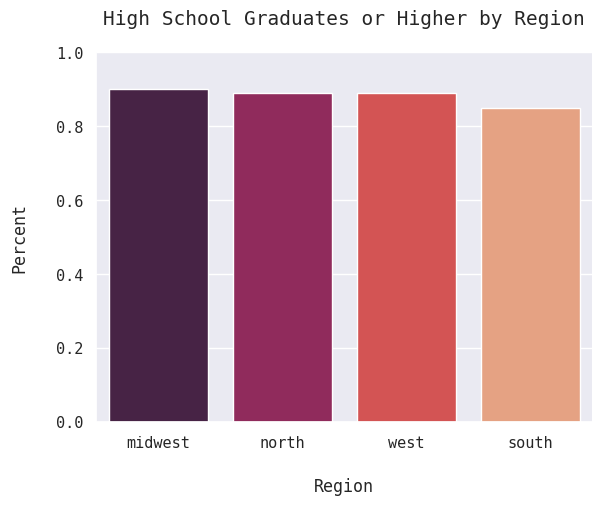

In [37]:
index = ['midwest', 'north', 'west', 'south']
sns.barplot(data=census_charts, y='High school grads or higher', x='Region', palette='rocket', order=index)
plt.title('High School Graduates or Higher by Region')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Percent', labelpad=20)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.show()

In [38]:
census_charts['High school grads or higher'].value_counts()

High school grads or higher
0.89    2
0.85    1
0.90    1
Name: count, dtype: int64

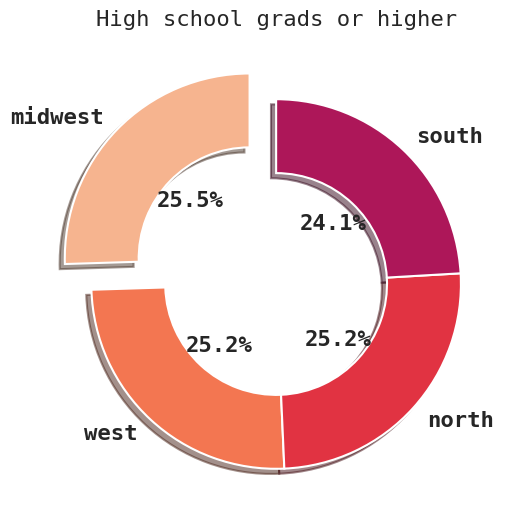

0.022


In [39]:
labels = ['midwest', 'west', 'north', 'south']
sizes = [.90, .89, .89, .85]
explode = (0.2, 0, 0, 0)
bold_font = FontProperties(weight='bold', size=16)
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       wedgeprops={'width':.4, 'linewidth':1.5}, textprops={'fontproperties': bold_font},
       pctdistance=.45)
plt.title('High school grads or higher', size=16)
plt.show()
print(census_charts['High school grads or higher'].std().round(3))

#### High school grads or higher by Region Analysis
There are 3 tiers to hand out when considering which regions are better than others in terms of high school graduate educational outcomes. Midwest is first sitting at 90%, West & North are both second place sitting at 89%, lastly South is limping along at 85%. Lets compare these bar chart differences to the pie chart. Here its apparent how closely matched these regions are for this category. Variance of values is only 1.4%. Standard deviation is a fraction at .022 - evidence for this insight. You can't detect these variances when looking at the pie chart, only by utilizing the slice percentages. The max is 25.5% (West) and the min is 24.1% (South).

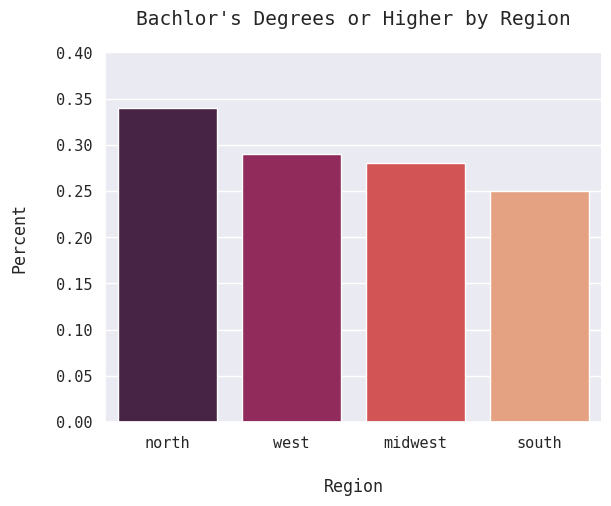

In [40]:
index = ['north', 'west', 'midwest', 'south']
sns.barplot(data=census_charts, y='Bachelor\'s degree or higher', x='Region', palette='rocket', order=index)
plt.title('Bachlor\'s Degrees or Higher by Region')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Percent', labelpad=20)
plt.yticks(np.arange(0, .41, 0.05))
plt.show()

In [41]:
census_charts['Bachelor\'s degree or higher'].value_counts()

Bachelor's degree or higher
0.29    1
0.25    1
0.34    1
0.28    1
Name: count, dtype: int64

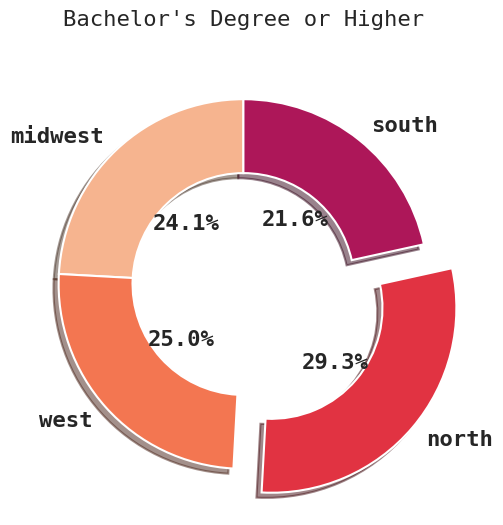

0.037


In [42]:
labels = ['midwest', 'west', 'north', 'south']
sizes = [.28, .29, .34, .25]
explode = (0, 0, 0.2, 0)
bold_font = FontProperties(weight='bold', size=16)
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       wedgeprops={'width':.4, 'linewidth':1.5}, textprops={'fontproperties': bold_font},
       pctdistance=.45)
plt.title('Bachelor\'s Degree or Higher', size=16)
plt.show()
print(census_charts['Bachelor\'s degree or higher'].std().round(3))

#### Bachelor's degree or higher by Region Analysis
There are 3 tiers to hand out when considering which regions are better than others in terms of Bachelor's degree or higher educational outcomes. North is first sitting at 34%, West is second place sitting at 29%, shortly behind is Midwest at 28%, lastly South is limping along at 25%. Lets compare these bar chart differences to the pie chart. The categories of this pie chart are more distinguishable from each other in terms of area size than the last; proven by standard deviation & variance % comparison. Variance of values is 7.7%. Standard deviation is a fraction at .037 - evidence for this insight. You cat detect the minimum and maximum area size difference only on the pie chart. The max is 29.3% (North) and the min is 21.6% (South).
### Bivariate Analysis
* How does every state compare to each other for educational outcomes?
* Is it more insightful to compare states or regions on a chart?
* What regions & states outperform others?

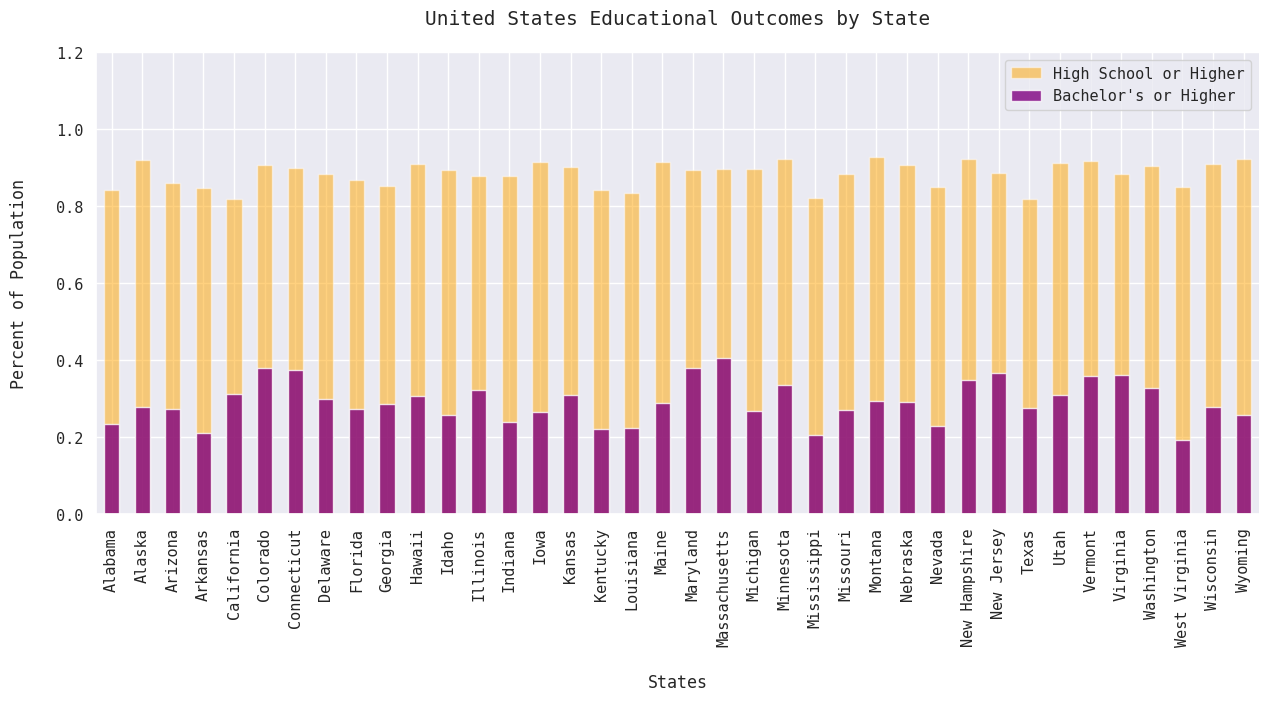

In [43]:
education_hs_mean = census_table.iloc[0:1].mean(numeric_only=True)
education_hs_plot = education_hs_mean.plot(kind='bar',figsize=(15,6), alpha=0.5,
                                           color='orange', legend=True, label='High School or Higher',
                                           title='United States Educational Outcomes by State'
                                          )

education_bs_mean = census_table.iloc[1:2].mean(numeric_only=True)
education_bs_plot = education_bs_mean.plot(kind='bar', figsize=(15,6), alpha=0.8, xlabel='States', ylabel='Percent of Population',
                                           color='purple', legend=True, label='Bachelor\'s or Higher'
                                          )
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1, 1.2])
plt.ylabel('Percent of Population', labelpad=20)
plt.xlabel('States', labelpad=20)
plt.show()

#### Educational Outcomes by State Analysis
Providing this state comparison enables insight into the impact a particular state's educational outcomes has on the amount of firearms and permits distributed within their residencies for 2016. The average for each state was extracted by the census and is displayed on the "United States Educational Outcomes" chart. These results are not a constant throughout the continental United States. Certain states clearly have a more encouraging environment for seekers of education accolades. These outliers include: Colorado, Connecticut, Maryland, Massachusetts, Minnesota, New Hampshire, New Jersey, Vermont, and Virginia. States tending to inhibit education include: Alabama, Arkansas, Indiana, Kentucky, Louisiana, Mississippi, Nevada, West Virginia, Wyoming. The ranking tiers provided below indicate that improved education does have a slight correlation to firearm & permit totals. However, this result does appear to be marginal. Other categories have favorable odds in terms of showing a stronger correlation regarding registered firearms.

#### Improved Education States Ranking
##### Low Total Guns & Permits: Colorado, Virginia, Vermont
##### Average Total Guns & Permits: Maryland, Massachusetts, New Hampshire, New Jersey
##### High Total Guns & Permits: Minnesota, Connecticut
#### Limited Education States Ranking
##### Low Total Guns & Permits: Indiana, Wyomong
##### Average Total Guns & Permits: Nevada, Kentucky, Louisiana
##### High Total Guns & Permits: Alabama, Arkansas, West Virginia

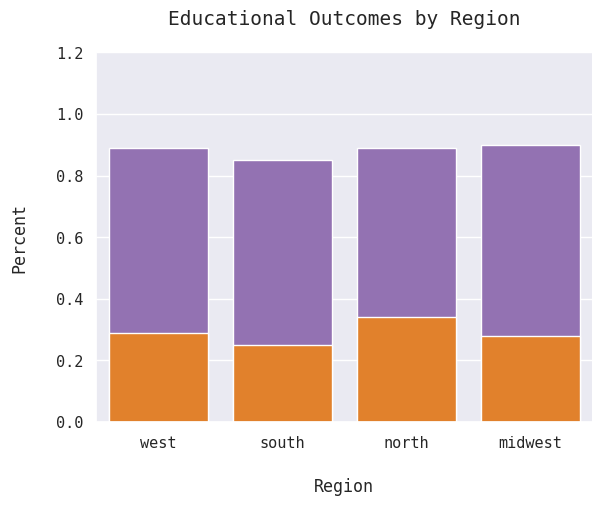

In [44]:
sns.barplot(data=census_charts, y='High school grads or higher', x='Region', color='tab:purple')
sns.barplot(data=census_charts, y='Bachelor\'s degree or higher', x='Region', color='tab:orange')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Percent', labelpad=20)
plt.yticks(np.arange(0, 1.3, 0.2))
plt.title('Educational Outcomes by Region')
plt.show()

#### Educational Outcomes by Region Analysis
Percents won't be analyzed as this chart is a combination of what has been previously analyed. This is exploring the relationship between the 2 educational outcome features. North was almost max for both features, however midwest minorly took the lead in "high shool grads or higher". This could definitely change next year however since it is such a close call. West could even be the top region in that aspect. What is guaranteed unless major changes happen, is south obtaining lowball status again for both categories. If south has most firearms, this can be considered a correlating factor, or vice versa.

## *Research Question #2*
#### *Are increased poverty levels affecting registered firearm totals?*
### Univariate Analysis
* What are population distributions of poverty level percents?
* Which regions are the min and max? Is south the min for this data too?
* Is the standard deviation and variance as closely evaluated versus education outcomes?

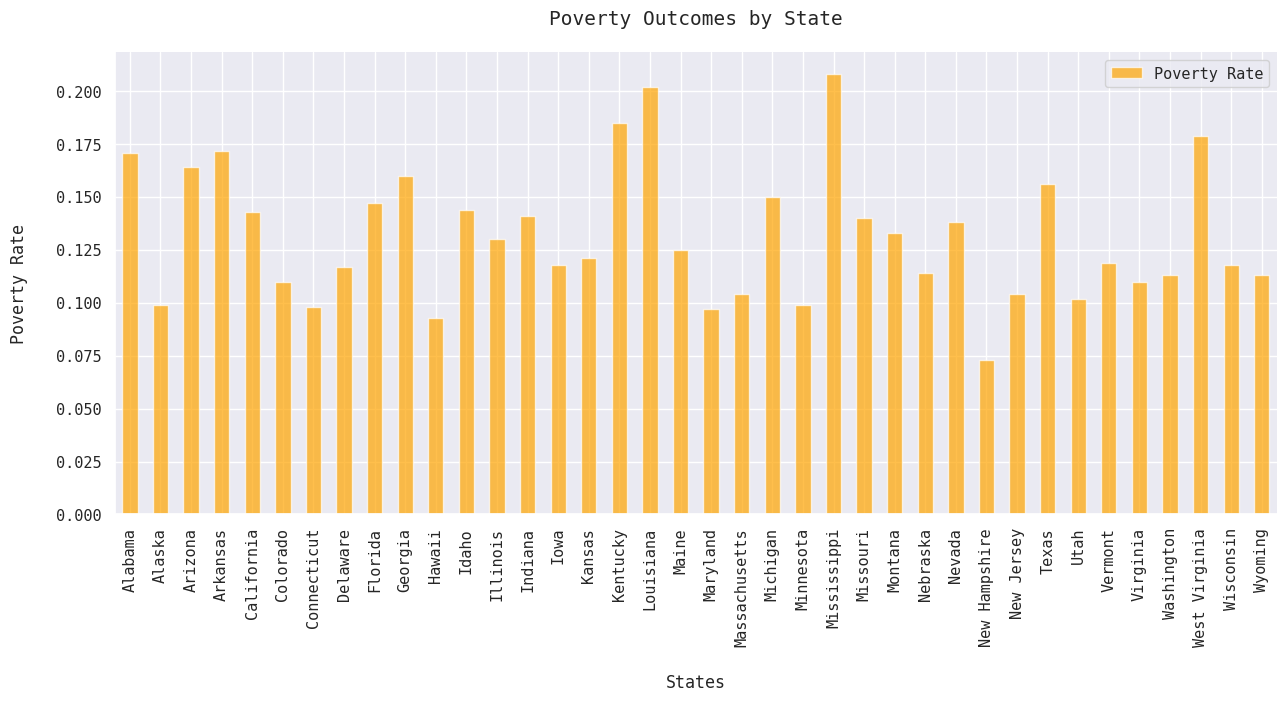

In [45]:
poverty_rates = census_table.iloc[2:3].mean(numeric_only=True)
poverty_rates_plot = poverty_rates.plot(kind='bar',figsize=(15,6), alpha=0.7, title='Poverty Outcomes by State',
                                        color=['orange'], legend=True, label='Poverty Rate'
                                        )
plt.ylabel('Poverty Rate', labelpad=20)
plt.xlabel('States', labelpad=20)
plt.show()

#### Poverty Outcomes by State Analysis
Poverty rate is not a constant throughout the continental United States. Certain states clearly have a better acquitted environment for money accessibility or governmental policies to assist those who are are victims of unfortunate circumstances. These outliers include: Alaska, Colorado, Connecticut, Hawaii, Maryland, Massachusetts, Minnesota, New Hampshire, Utah, Virginia, Washington. States that show a tendency to enable povery include: Alabama, Arizona, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, Texas, West Virginia. The ranking tiers provided below indicate that lower povery rates does have noticable relationship with 2016's yearly guns report. This evidence supported insight has proven the hyposthesis from the previous research question: "Other categories have favorable odds in terms of showing a stronger correlation regarding registered firearms," to be true.

#### Low Poverty Rate States Ranking
##### Low Total Guns & Permits: Colorado, Virginia, Washington
##### Average Total Guns & Permits: Maryland, Massachussetts, New Hampshire, Utah
##### High Total Guns & Permits: Minnesota, Connecticut
#### High Poverty Rate States Ranking
##### Low Total Guns & Permits: Texas
##### Average Total Guns & Permits: Kentucky, Mississippi
##### High Total Guns & Permits: Alabama, Arkansas, West Virginia, Georgia, Florida, Arizona

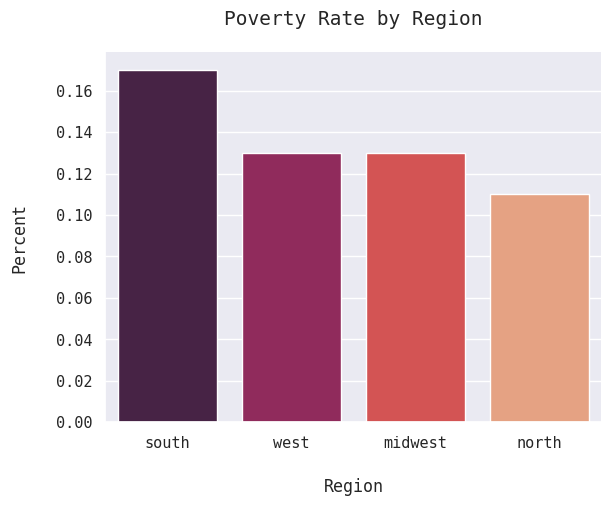

In [46]:
index = ['south', 'west', 'midwest', 'north']
sns.barplot(data=census_charts, y='Poverty percent', x='Region', palette='rocket', order=index)
plt.title('Poverty Rate by Region')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Percent', labelpad=20)
plt.show()

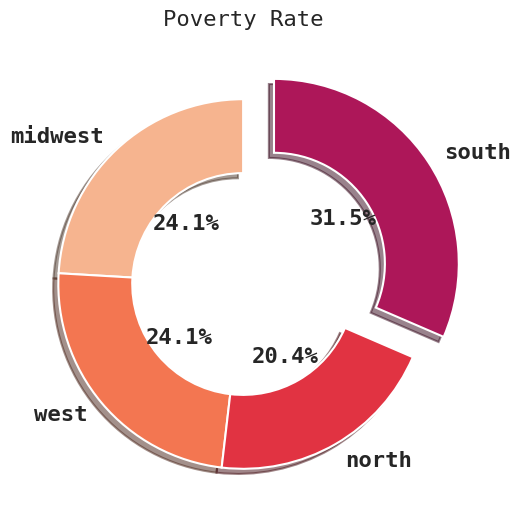

0.025


In [47]:
labels = ['midwest', 'west', 'north', 'south']
sizes = [.13, .13, .11, .17]
explode = (0, 0, 0, 0.2)
bold_font = FontProperties(weight='bold', size=16)
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       wedgeprops={'width':.4, 'linewidth':1.5}, textprops={'fontproperties': bold_font},
       pctdistance=.45)
plt.title('Poverty Rate', size=16)
plt.show()
print(census_charts['Poverty percent'].std().round(3))

#### Poverty Rate by Region Analysis
Well unfortunately for my southern brotheren, the regions has again called dibs on maintaining its status as supremely worst region. It's povery rate sits at a whopping 17%. Contrasted by North at 11%. Mid & midwest are neck & neck, both at 13%. So far, competition for best has been between mid & midwest & north. Referencing the pie chart, one can see the the percentage breakdown for each region. South sits at 31.5% of the total, contrasted by north at 20.4%, finally midwest & west at 24.1%. The variance between midwest & west to north is not jaw-dropping in any aspect, but is substantially more when comparing north to south. Standard deviation clocked at .025. Which is less than the bachelors's degree standard deviation but 3 hundredths higher than high school grads standard deviation.

## *Research Question #3*
#### *Does region ethnicity groups differ vastly? How does this play into registered firearm count?*
### Multivariate Analysis
* What are population distributions of ethnicity percents?
* Which regions are most diverse in ethnicity?
* Will south once again represent the extreme value in the comparison?

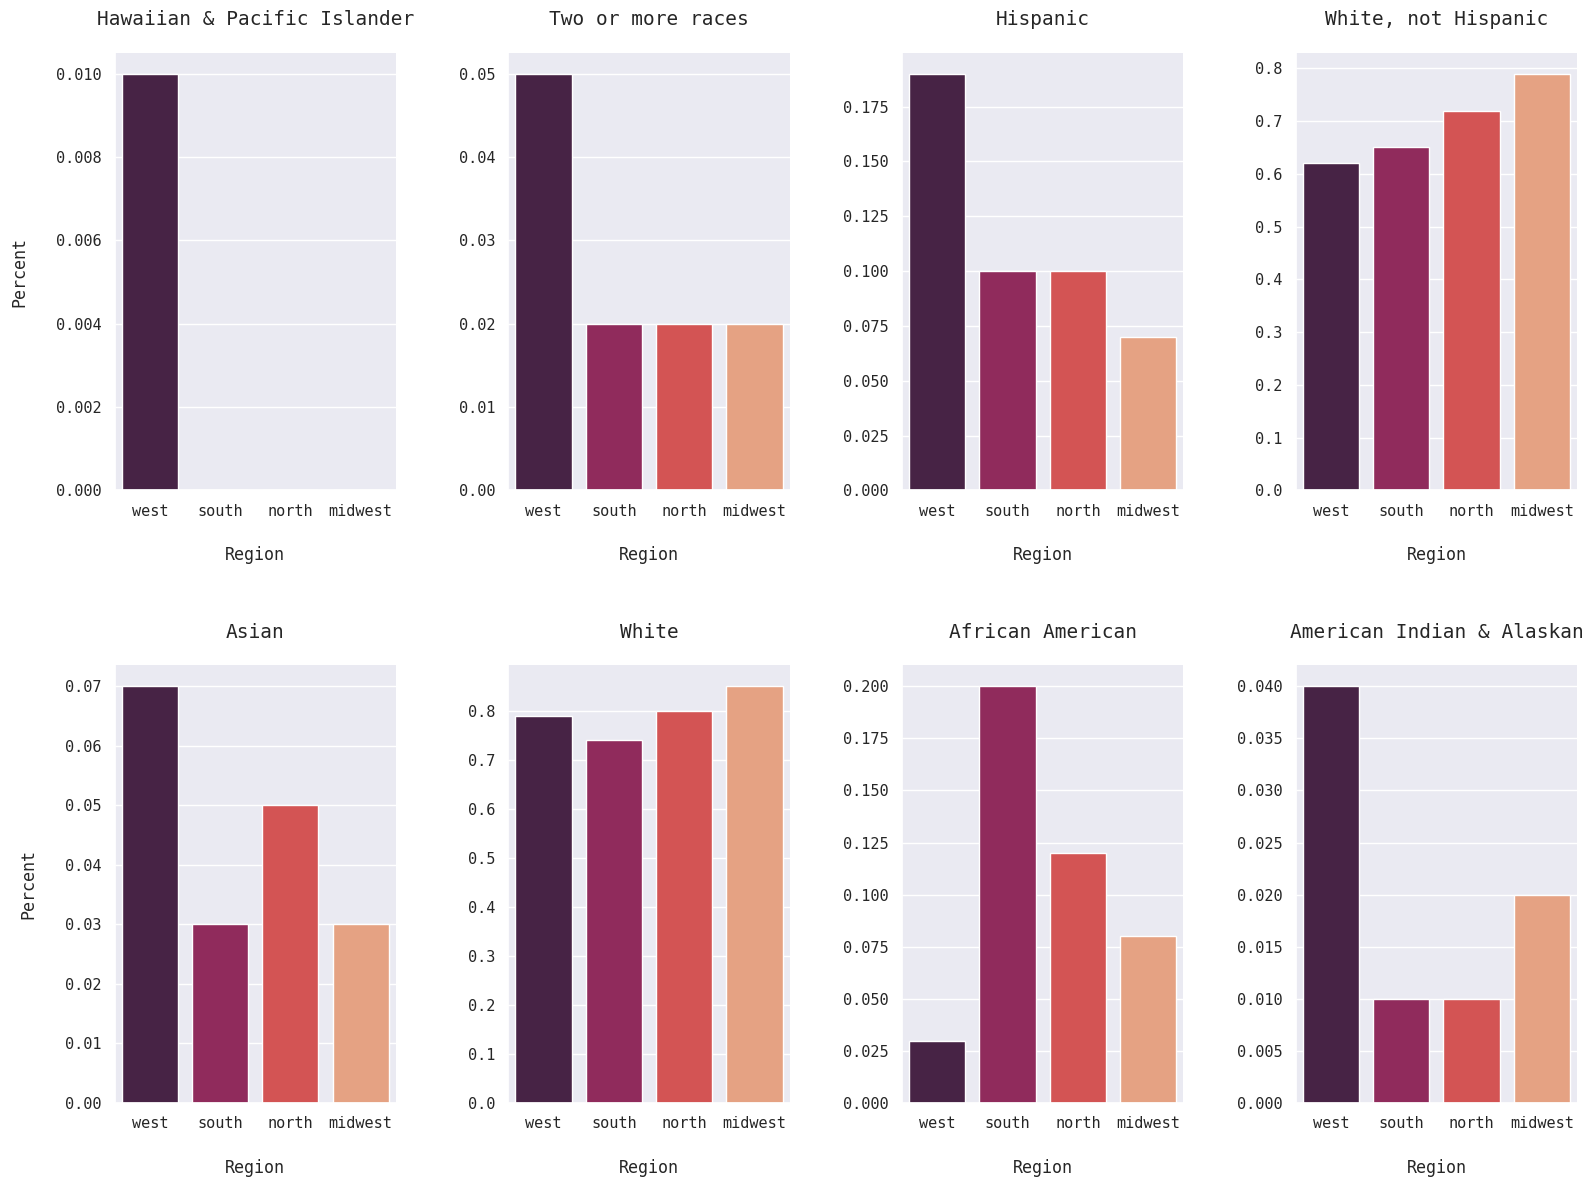

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(16, 12))

# Define the column names and titles for each subplot
column_names = ['Hawaiian & Pacific Islander', 'Two or more races', 'Hispanic', 'White, not Hispanic',
                'Asian', 'White', 'African American', 'American Indian & Alaskan']
titles = ['Hawaiian & Pacific Islander', 'Two or more races', 'Hispanic', 'White, not Hispanic', 'Asian',
          'White', 'African American', 'American Indian & Alaskan']

# Calculates appropriate row & col indices for each subplot, and creates bar plot
for i, column in enumerate(column_names):
    row = i // 4
    col = i % 4
    ax = sns.barplot(data=census_charts, y=column, x='Region', palette='rocket', ax=axes[row, col])
    ax.set_title(titles[i])
    ax.set_xlabel('Region', labelpad=20)
    ax.set_ylabel('', labelpad=20)
    if i == 0 or i == 4:
        ax.set_ylabel('Percent', labelpad=20)
    else:
        ax.set_ylabel('', labelpad=20)

plt.tight_layout()
plt.subplots_adjust(hspace=.4, wspace=.4)
plt.show()

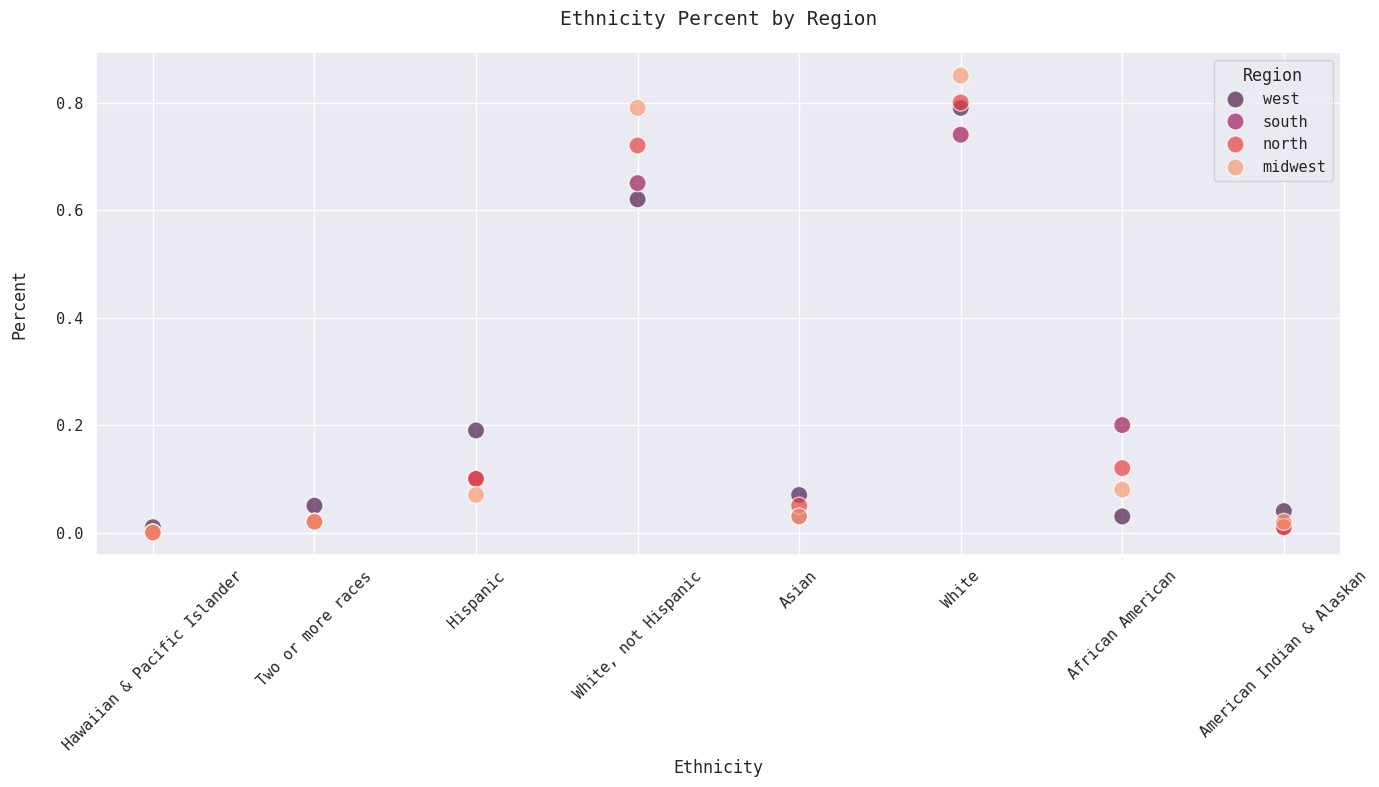

0.31


In [49]:
# Define the column names and titles for each ethnicity
column_names = ['Hawaiian & Pacific Islander', 'Two or more races', 'Hispanic', 'White, not Hispanic',
                'Asian', 'White', 'African American', 'American Indian & Alaskan']

# Reshape the data to have 'Region' as x-axis and ethnicity as a column
melted_data = census_charts.melt(id_vars=['Region'], value_vars=column_names, var_name='Ethnicity', value_name='Percent')

# Create a scatterplot
plt.figure(figsize=(14, 8))
scatterplot = sns.scatterplot(data=melted_data, x='Ethnicity', y='Percent', hue='Region', palette='rocket', s=150, alpha=.7)
plt.title('Ethnicity Percent by Region')
plt.xlabel('Ethnicity')
plt.ylabel('Percent', labelpad=20)
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()
print(melted_data.Percent.std().round(2))

#### Ethnicity Percents by Region Analysis
Referencing the bar plot, its noticable how West region has the most diverse ethnicity makeup since it's the max value in 5 of the subplots. A racial group not represented in the West region however are African Americans. These people tend to live in south and north regions. North is more culturally diverse to the south by only 1 ethnicity group. If African Americans were to move into north territory then this would give North a +3 to South. Midwest region is crowned as least culturally diverse. Now referencing the scatterplot, notice that it's on a normalized percentage scale unlike the bar graphs, which uses unqiue y-axis ticks for each category. This different scaling shows insight into how much each ethnicity contribute to the regional population. The ranking is White, White not Hispanic, Hispanic, African American, Asian, Two or more races, American Indian & Alskan, and finally Hawaiian & Pacific Islander. A couple of these categories had minute differences so the corresponding barplot was inspected to determine this order. Standard deviation is .31

## *Research Question #4*
#### *What's the yearly trend for total guns distributed in a region?*
### Univariate Analysis
* What is gun trend totals by year for each region?
* What category from the above list has the max standard deviation? And the min?
* Will south once again represent the extreme value in the comparison?
#### Firearm tables for sum & mean have to be reformatted with pd.melt()

In [50]:
begin_tables = [north_df_s, south_df_s, west_df_s, midwest_df_s, north_df_m, south_df_m, west_df_m, midwest_df_m]
finish_tables = []

# Melting operation
for count, item in enumerate(begin_tables):
    new_table = pd.melt(item, id_vars='label', var_name='year', value_name='sum',
                            value_vars=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
    finish_tables.append(new_table)

# Assigning melted tables proper names
north_chart_s = finish_tables[0]
south_chart_s = finish_tables[1]
west_chart_s = finish_tables[2]
midwest_chart_s = finish_tables[3]
north_chart_m = finish_tables[4]
south_chart_m = finish_tables[5]
west_chart_m = finish_tables[6]
midwest_chart_m = finish_tables[7]

# Lists for line plot loops
sum_tables = [north_chart_s, south_chart_s, west_chart_s, midwest_chart_s]
mean_tables = [north_chart_m, south_chart_m, west_chart_m, midwest_chart_m]

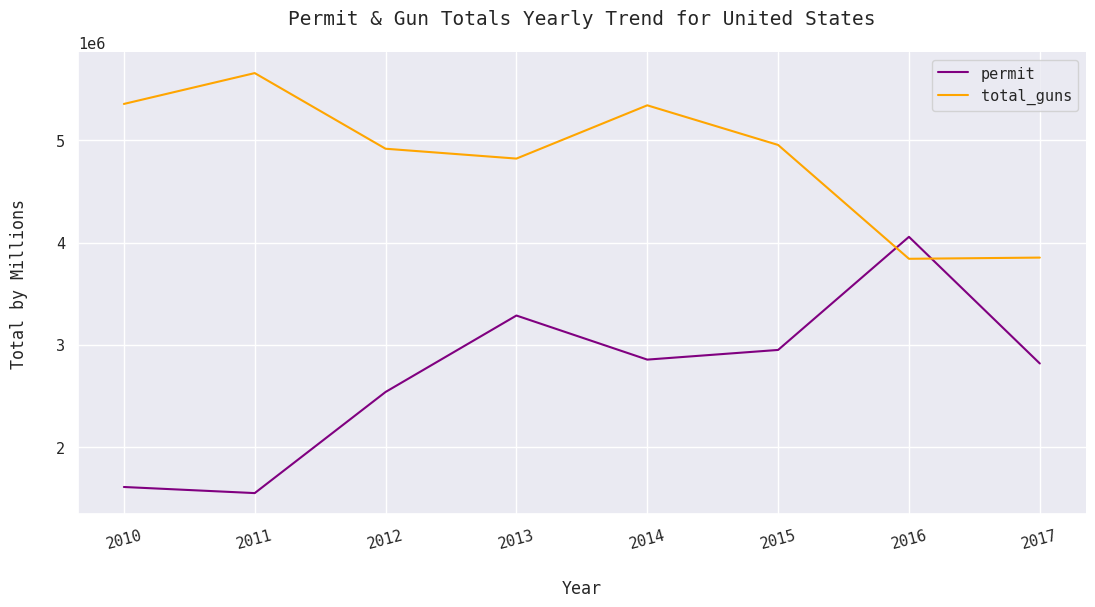

In [51]:
yearly_fa = firearms_table.drop(columns=['month_digit', 'state' ,'handgun', 'long_gun', 'other', 'multiple',
                                        'redemption_handgun', 'redemption_long_gun']).groupby('year')
yearly_fa.sum().plot(kind='line', y=['permit','total_guns'], legend=True, title='Permit & Gun Totals Yearly Trend for United States',
                    figsize=(13,6), color=['purple', 'orange'])
plt.ylabel('Total by Millions', labelpad=20)
plt.xlabel('Year', labelpad=20)
plt.xticks(rotation=15)
plt.show()

#### Permit & Gun Totals Yearly Trend for United States Analysis
Its interesting to note how permit and total_guns have a inverted, mirror style relationship. When one goes down, the other category increases. In 2010, these categories start on polar opposites of the graph. Total_guns is at 5.5 million meanwhile permits is at 1 million. From this starting node forward, one can witness this mirror trend until the end node of 2017. They finally intersect at year 2016, just before to be precise. After an entire 5 years of total_guns staying ontop, they trade places for what appears to be a couple months potentially then trade back to their original places. This provides evidence to how they are correlated to each other. 

In [52]:
# Region version tables for the line charts of United States above
line_table_s = south_chart_s.query('(label == "permit") | (label == "total_guns")')
line_table_n = north_chart_s.query('(label == "permit") | (label == "total_guns")')
line_table_w = west_chart_s.query('(label == "permit") | (label == "total_guns")')
line_table_mw = midwest_chart_s.query('(label == "permit") | (label == "total_guns")')
line_table_s.head(4)

,label,year,sum
4,permit,2010,612186
7,total_guns,2010,2061930
12,permit,2011,465274
15,total_guns,2011,2148955


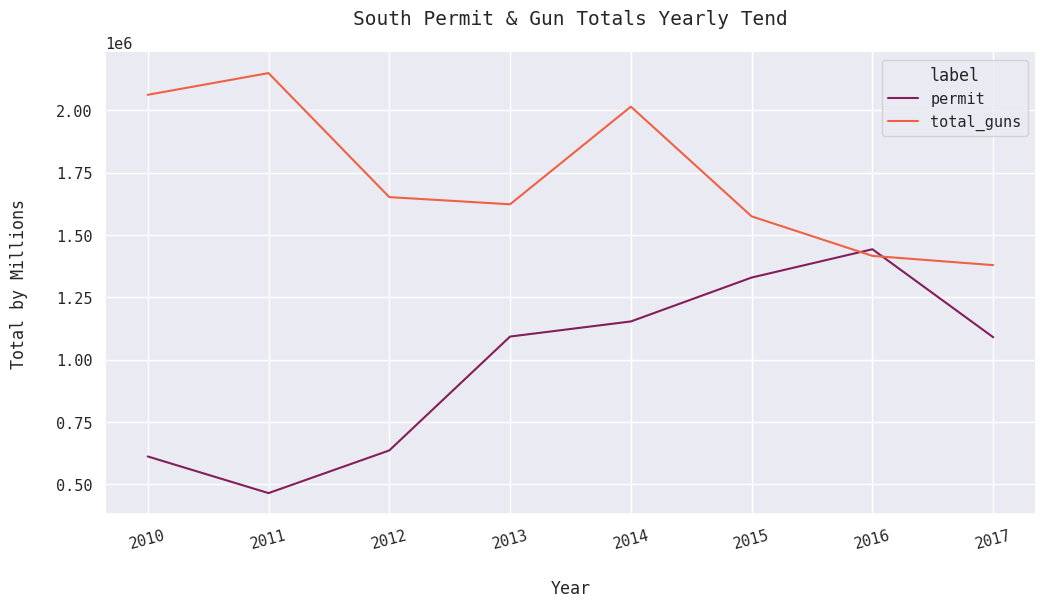

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=line_table_s, x='year', y='sum', hue='label', palette='rocket')
plt.ylabel('Total by Millions', labelpad=20)
plt.xlabel('Year', labelpad=20)
plt.xticks(rotation=15)
plt.title('South Permit & Gun Totals Yearly Tend')
plt.show()

#### South Permit & Gun Totals Yearly Trend Analysis 
#### Permit: Low(.5), High(1.4) | Total_guns: Low(1.4), High(2.25)
Total_guns & permits attributes display a prone to changing environment. Neither ever stabilize but instead experience sharp declines or increases, forming mountainous appearing lines. These attributes are not attuned to each other, which supports the notion of South states having different procedures or laws in effect for them. It's inferable from this insight; that they have a lax approach to currently owned firearms, but receiving a new permit is a bit trickier for a resident. A drastic change to these policies would be required in order for South states to have excess firearms removed from the population.

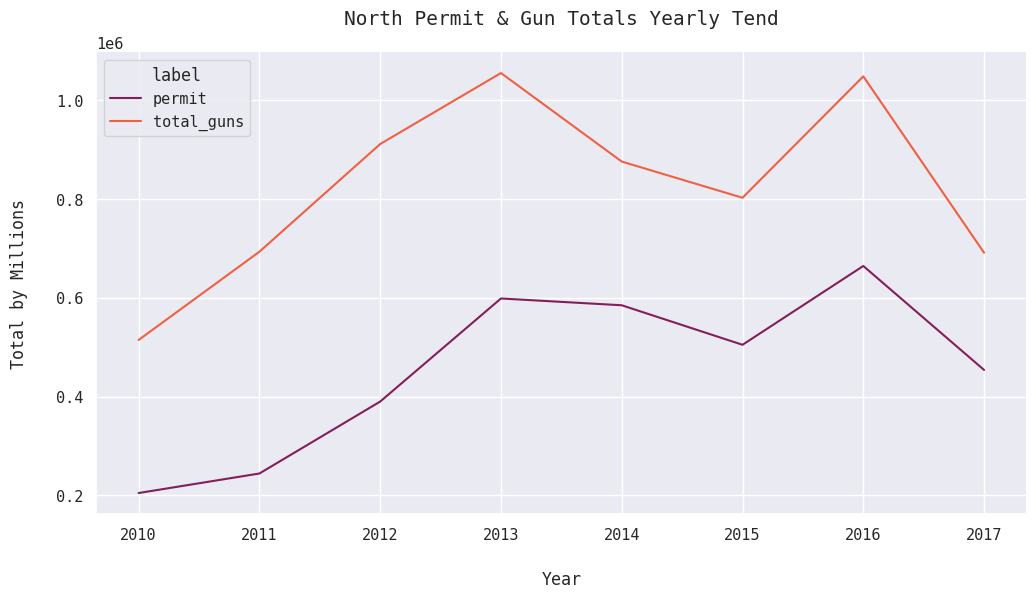

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(data=line_table_n, x='year', y='sum', hue='label', palette='rocket')
plt.ylabel('Total by Millions', labelpad=20)
plt.xlabel('Year', labelpad=20)
plt.title('North Permit & Gun Totals Yearly Tend')
plt.show()

#### North Permit & Gun Totals Yearly Trend Analysis 
#### Permit: Low(.25), High(.5) | Total_guns: Low(.5), High(1):
Total_guns & permits attributes display a consistency in the yearly tends amounts. Neither present sharp peaks or rapid increases, as evolution of policies favoring firearm increases are halted. These attributes additionally mirror one another, showcasing how the Northeastern region handles both permits and firearms with similar procedures or laws. Northeastern states view both attributes as having a symbiotic relationship with each other, to which they appropriately police.

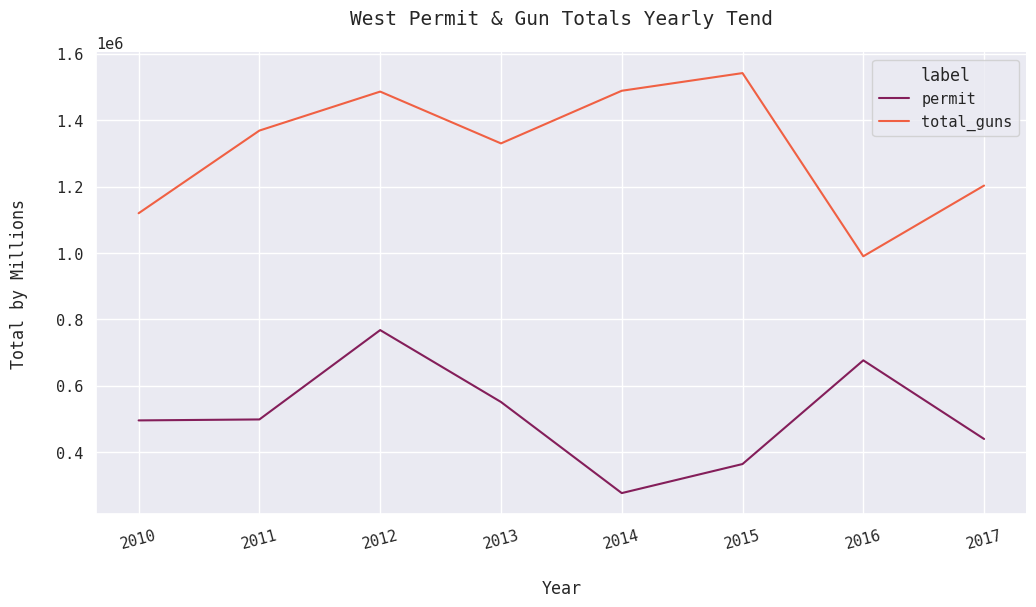

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=line_table_w, x='year', y='sum', hue='label', palette='rocket')
plt.ylabel('Total by Millions', labelpad=20)
plt.xlabel('Year', labelpad=20)
plt.xticks(rotation=15)
plt.title('West Permit & Gun Totals Yearly Tend')
plt.show()

#### West Permit & Gun Totals Yearly Trend Analysis 
#### Permit: Low(.25), High(.75) | Total_guns: Low(.9), High(1.5)
Total_guns & permits attributes display a consistency which rivals the North region better than other regions. While there is overall an efflux of for the later years of 2015 & 2016, utilizing data from previous years informs of an influx possibility for 2017 onward. If the West region truly wishes to lower its firearms population, then enacting policies similar to North will benefit that agenda. Nonetheless, a competent & equal approach is shown for both attributes from their symbiotic relationship.

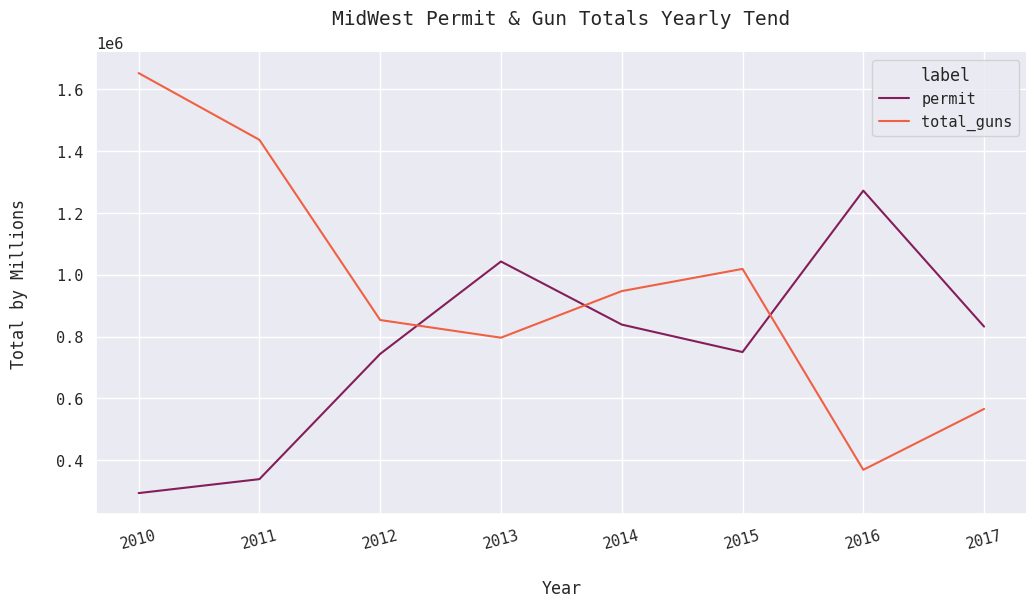

In [56]:
plt.figure(figsize=(12,6))
sns.lineplot(data=line_table_mw, x='year', y='sum', hue='label', palette='rocket')
plt.ylabel('Total by Millions', labelpad=20)
plt.xlabel('Year', labelpad=20)
plt.xticks(rotation=15)
plt.title('MidWest Permit & Gun Totals Yearly Tend')
plt.show()

#### MidWest Permit & Gun Totals Yearly Trend Analysis 
#### Permit: Low(.25), High(1.25) | Total_guns: Low(.3), High(1.65)
Uniquely of the Midwest, Total_guns attributes has a supreme volatility compared to other regions. Apex permit volatility is awarded to the South. Contrasting from its volatile rival, the South, the Midwest is introduced to an era of balance with a shape of an inverted mirror relationship.  When permits rise, total_guns fall. Policies in this region procure a stricter approach on registered firearms distributed through the population compared to permits approved. This opposite magnetization of attributes could be reflected from a variety of governmental policies within the region. As time goes on, the response variables can either stay within this balanced structure or experience volatility due to the relationship currently shown.

#### These line charts have different y-ticks due to the varying amounts between regions. Below are the same charts with normalized y-ticks.

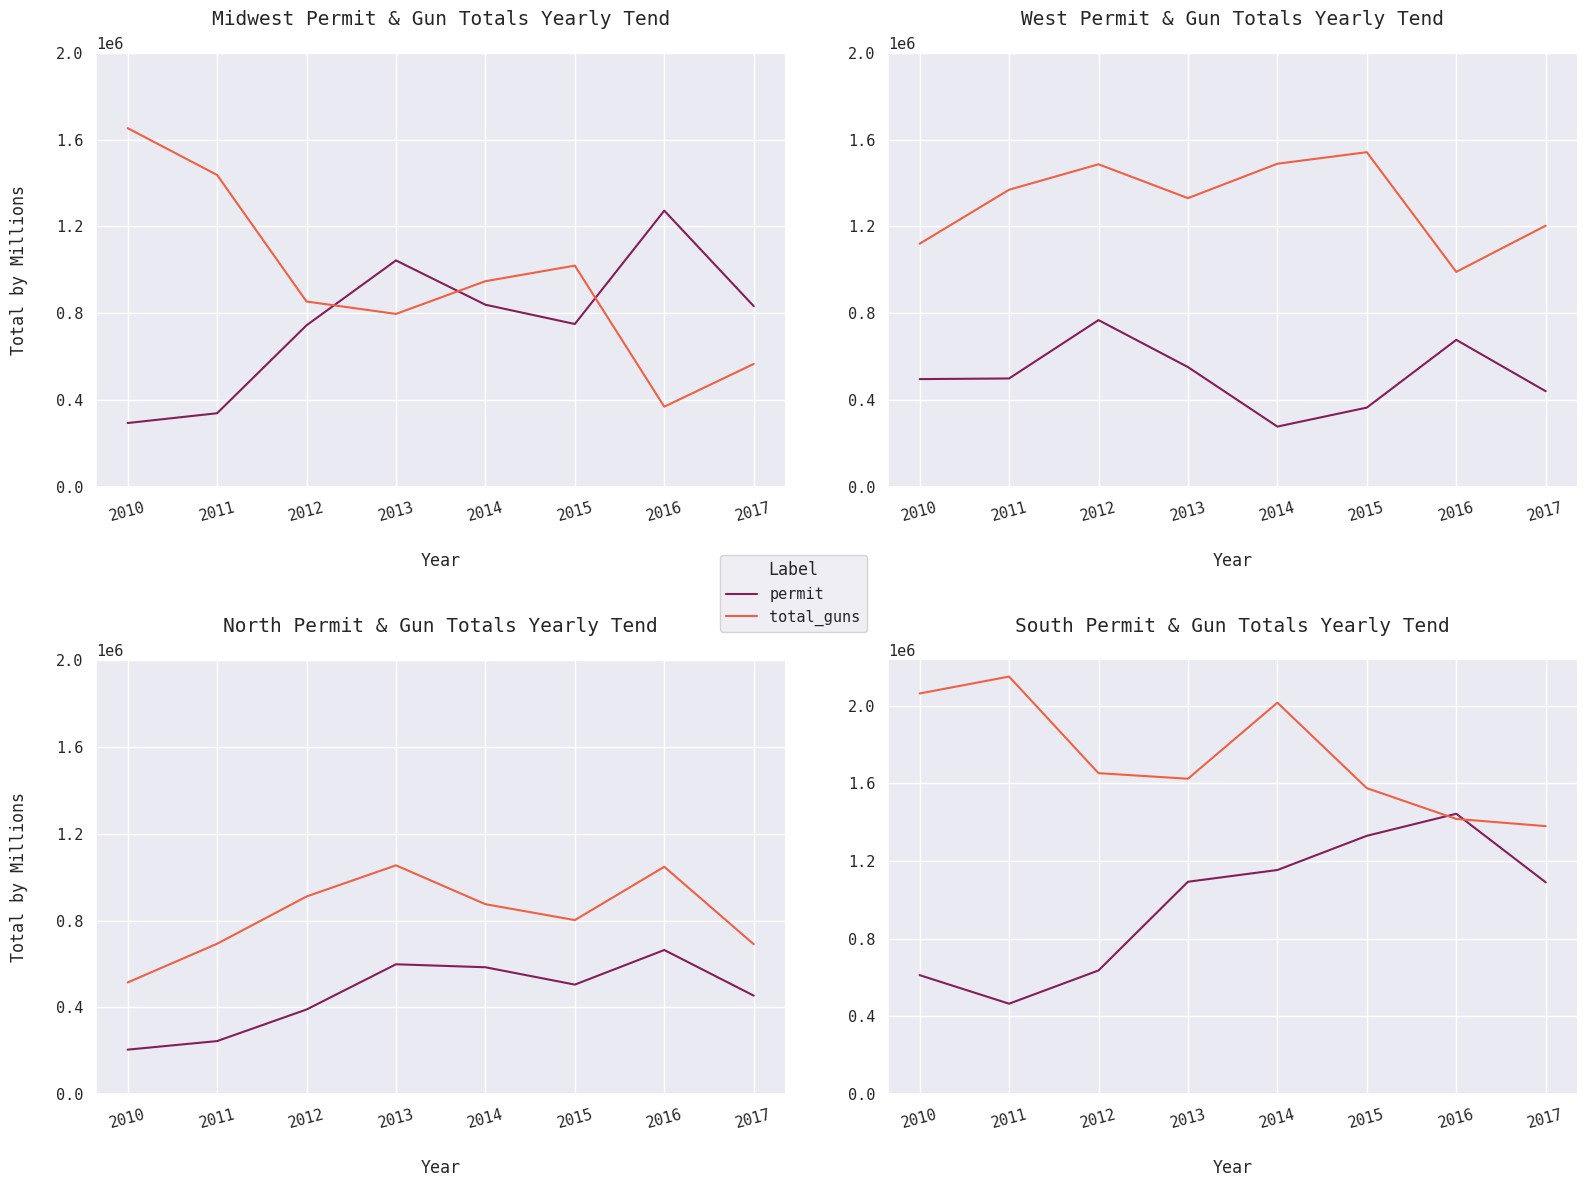

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Dataframes for different regions
dataframes = [line_table_mw, line_table_w, line_table_n, line_table_s]
regions = ['Midwest', 'West', 'North', 'South']

for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=dataframes[i], x='year', y='sum', hue='label', palette='rocket', ax=ax)
    ax.set_xlabel('Year', labelpad=20)
    ax.set_yticks(np.arange(0, 2300000, 400000))
    ax.set_title(f'{regions[i]} Permit & Gun Totals Yearly Tend')
    ax.tick_params(axis='x', rotation=15)
    ax.get_legend().remove()  # Remove the default legend
    if i == 0 or i == 2:
        ax.set_ylabel('Total by Millions', labelpad=20)
    else:
        ax.set_ylabel('', labelpad=20)
    

# Add a common artifacts
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Label', loc='center')


plt.tight_layout()
plt.subplots_adjust(wspace=.15, hspace=.4)
plt.show()

#### Normalized: Region Samples of Permit & Gun Totals Yearly Trend Analysis
This makes is simpler to perform a comparison analysis between regions. South has the max values for permits and total_guns. South's permit also increases the most over the time span, from 0.5 million to 1.4 million. Contrasting the max values of South is North winning min valeus for both categories, until 2016. Then Midwest hits a lower value with .04 million versus North at .7 million. In 2014 & 2015 West has lower permits than North. Regions besides South provide evidence for correlation between categories due to governmental policies or other factors. South lacks these independant variables causing them to not be included in this correlation.

### Bivariate Analysis
* What is gun trend & permit average comparisons between regions?
* Which region has the min value for these categories? Is it the same region?
#### Initializing mean tables for chart creationg of total_guns and permits

In [58]:
north_chart_m['region'] = 'north'
south_chart_m['region'] = 'south'
west_chart_m['region'] = 'west'
midwest_chart_m['region'] = 'midwest'

mean_chart = pd.concat([north_chart_m, south_chart_m, west_chart_m, midwest_chart_m])
mean_chart.rename(columns={'sum':'mean'}, inplace=True)
print(north_chart_m.shape)
print(mean_chart.shape)
mean_chart

(64, 4)
(256, 4)


,label,year,mean,region
0,handgun,2010,2159.0,north
1,long_gun,2010,1600.0,north
2,multiple,2010,58.0,north
3,other,2010,44.0,north
4,permit,2010,1552.0,north
...,...,...,...,...
59,other,2017,555.0,midwest
60,permit,2017,7705.0,midwest
61,redemption_handgun,2017,346.0,midwest
62,redemption_long_gun,2017,354.0,midwest


In [59]:
# Creating table for mean region permits
bar_chart_permit = mean_chart.query('label == "permit"').drop(['year', 'label'], axis=1).groupby('region')

# Creating table for mean region total_guns
bar_chart_guns = mean_chart.query('label == "total_guns"').drop(['year', 'label'], axis=1).groupby('region')

# Convert bar_chart_permit to a pivot table for plotting
bar_chart_p = bar_chart_permit.mean().round().reset_index()

# Convert bar_chart_guns to a pivot table for plotting
bar_chart_g = bar_chart_guns.mean().round().reset_index()
bar_chart_g

,region,mean
0,midwest,6795.0
1,north,6458.0
2,south,10662.0
3,west,8757.0


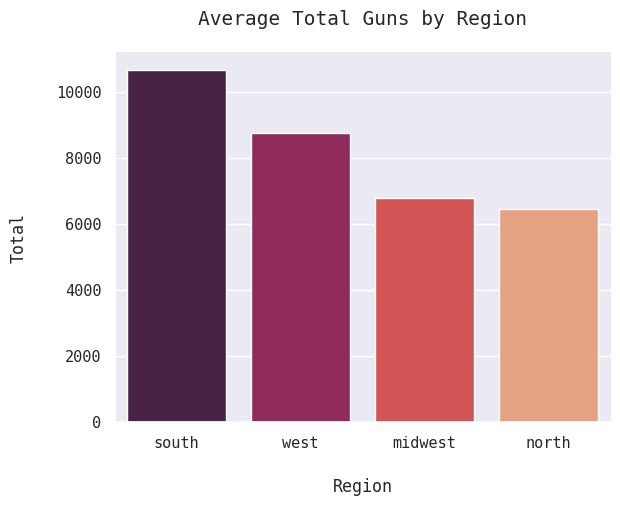

In [60]:
bar_chart_g.sort_values(by='mean', ascending=False, inplace=True)
sns.barplot(data=bar_chart_g, y='mean', x='region', palette='rocket')
plt.title('Average Total Guns by Region')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Total', labelpad=20)
plt.show()

#### Average Total Guns by Region Analysis
South has max value again with west following then midwest and finally north. They are all above the halfway y-tick so none can be considered dangerously minimal. Honestly its expected for South to be max considering its position in other charts. That value appears to be around 12000, with west @ 9000, midwest @ 7000, north @ 6500.

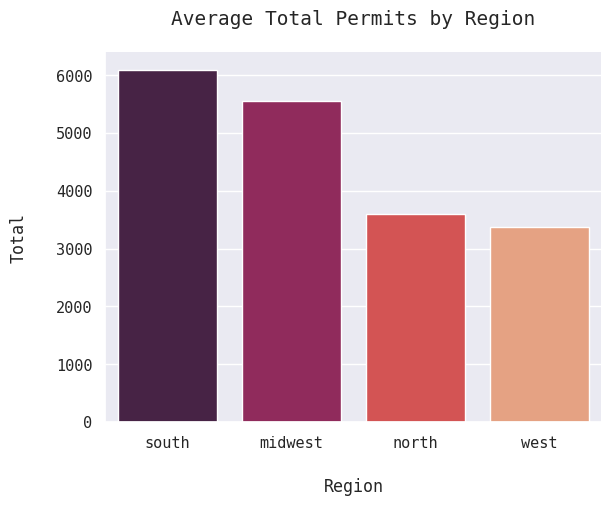

In [61]:
bar_chart_p.sort_values(by='mean', ascending=False, inplace=True)
sns.barplot(data=bar_chart_p, y='mean', x='region', palette='rocket')
plt.title('Average Total Permits by Region')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Total', labelpad=20)
plt.show()

#### Average Permits by Region Analysis
South has max value again with midwest following then north and finally west. They are all above the halfway y-tick so none can be considered dangerously minimal. Honestly its expected for South to be max considering its position in other charts. That value appears to be around 6000, with west @ 5500, north @ 3500, west @ 3200.

### Multivariate Analysis
* What is gun trend & permit yearly average comparisons between regions?
* Do all regions have the same low and high points?
* Which region has the min value for these categories? Is it the same region?

#### Combining mean region tables for toal_guns & permits into one table for a scatterplot

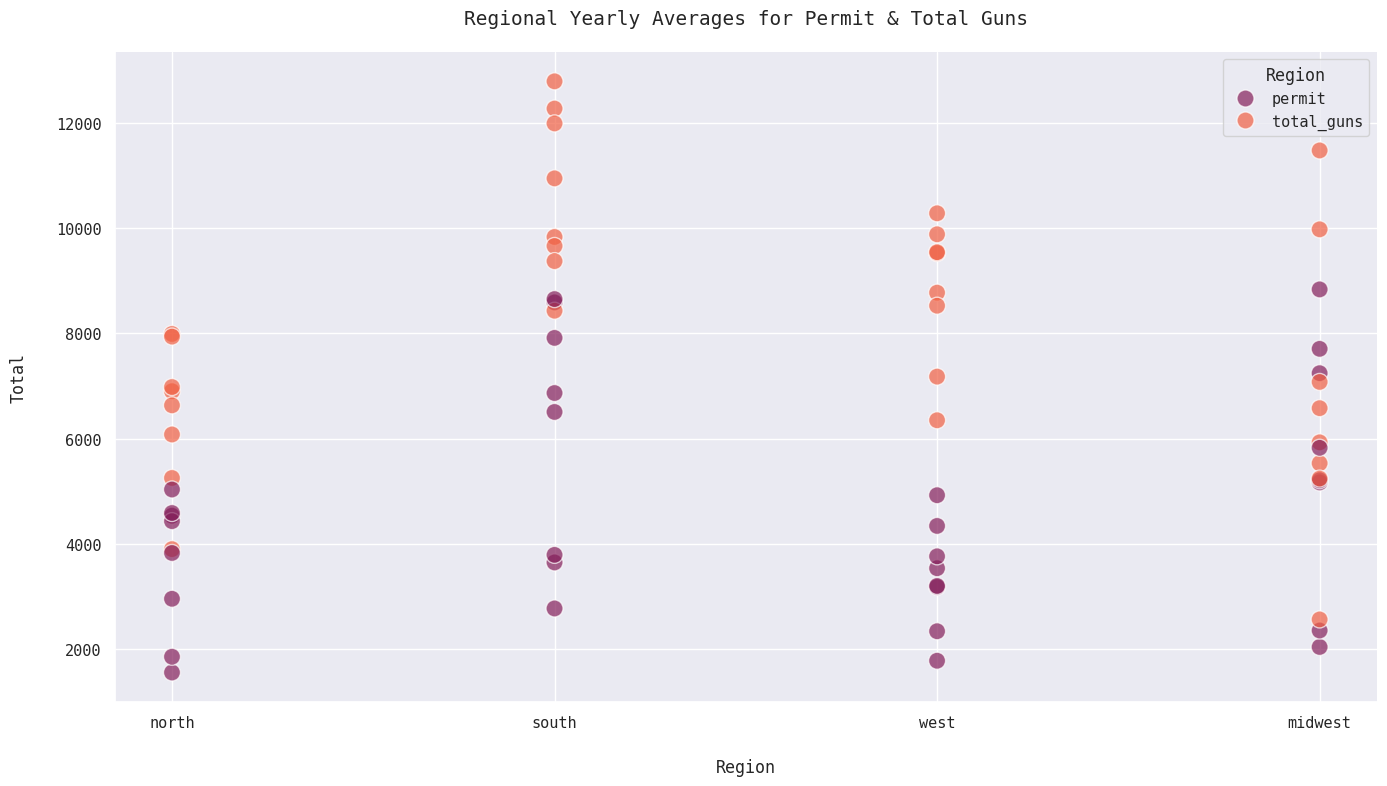

2906.02


In [62]:
# Grouping to the 2 categories being analyzed
scatter_chart = mean_chart.query('(label == "permit") | (label == "total_guns")')

plt.figure(figsize=(14, 8))
scatterplot = sns.scatterplot(data=scatter_chart, x='region', y='mean', hue='label', palette='rocket', s=150, alpha=.7)
plt.title('Regional Yearly Averages for Permit & Total Guns')
plt.xlabel('Region', labelpad=20)
plt.ylabel('Total', labelpad=20)
plt.legend(title='Region')
plt.tight_layout()
plt.show()
print(scatter_chart['mean'].std().round(2))

#### Regional Yearly Averages for Permit & Total Guns Analysis
Standard deviation is 2906.02 on a 13,000 max value scale. The trend for all regions is total_guns having the max value positions versus permit. West & south has total_guns yearly averages all above the 6,000 y-tick. South is again the max value with nort contrasting it. Midwest appears to have conflicting policies or laws within the region to cause the typical variation within this chart and others.

## *Research Question #4*
#### *Is time progression, poverty, or education contributing most significantly to registered firearms per capita?*
Educational outcomes for Highschool graduates and beyond has very minimal variance between regions. Max of .9 and min of .85. This encourages inspection of Bachelor's graduates and beyond since it is primed to impact more heavily. Max of .34 and min of .25. Bachelor's degrees also require a level of committment and discipline a high school student has not been challenged for. This has an unparrelled impact on intellectual capabilities of their population versus simpler to acquire high school diplomas.

Poverty rates provide a small degree of variance, with a max of .17 and min of .11. Thriving economies enable amenities, stability, governmental support, education, and other improvements compared to economies of lower financial standing. Due to this pronounced effect on the population and standard of living compared to graduating high school, this attribute is considered when analyzing chart-based evidence below.

With all data considered and evidence analyzed, there is a reachable and unreachable conclusion. The discrepancy between North and South across the board in response variables are supported by their polar opposite social, cultural, and governmental systems. Poverty and educational outcomes vary significantly between these regions, which in turn affects response variables to a distinguishable degree. Dissimilar to any other comparisons inspected here. However, an unreachable conclusion is the apparent differences between West and Midwest. The main factors behind this are not available within the data analyzed here. With similar poverty & educational outcomes, there is no distinction to be explored other than time progression. Variances of West and Midwest have to be chalked up to policies, economies, etc.

Mid & Midwest are influenced by time progression, less so by poverty & educational outcomes. What is important to distinguish however, is the overall reduced number of firearms & permits distributed through within their populace; which provides evidence towards the South's standing. If the region improves quality of life, education, governmental support, and safety by lowering poverty induced crimes, then these response variables will devolve into lower manifestations instead of fueling an Apex Firearms Region. Contrasting such a title is Northeastern states. With minimal peaks, stabilized response variables, and better outcomes for its residents, Northeastern region will continue to experience its era of balance and overall improved safety. Analysis of Northeastern & South regions concludes an evidence supported correlation between education & poverty outcomes instead of time progression.
## Concluding Paragraphs
In conclusion, this data analysis has provided insights into the complex relationship between various factors and registered firearms in the United States. Here are the key findings and concluding statements based on the research questions:

<img src="gold_filigree_small.png" alt="Gold Filigree Image">

#### Impact of Education on Registered Firearms:
There is a marginal correlation between improved education outcomes and registered firearm totals.
Some states with higher educational attainment tend to have lower total guns and permits, but this correlation is not very strong.
Other factors may have a stronger influence on firearm registrations.

#### Impact of Poverty on Registered Firearms:
Lower poverty rates show a noticeable relationship with lower registered firearm totals.
States with lower poverty rates tend to have fewer firearms and permits, indicating a link between economic stability and firearm ownership.
This suggests that addressing poverty and improving living conditions may contribute to lower firearm registrations.

#### Time Progression Insights:
Different regions of the United States exhibit varying trends in registered firearm totals over time.
Northeastern states show stability and balance in firearm and permit numbers.
The South experiences sharp fluctuations in both permits and total guns, indicating a dynamic environment.
The West region exhibits consistency in both permits and total guns, with the potential for future changes.
The Midwest region displays a balanced relationship between permits and total guns, with a focus on policy impact.

#### Contributing Factors to Registered Firearms per Capita:
The analysis suggests that the most significant factors contributing to registered firearms per capita are education and poverty rates.
Regions with lower poverty rates and higher educational attainment tend to have lower firearm registrations.
Time progression plays a role in certain regions, such as the South, where fluctuations are evident.
However, it's important to note that this analysis has limitations. Additional research is needed to explore other factors not covered in this dataset, such as specific state policies, cultural differences, and socioeconomic factors that may influence firearm ownership. Additionally, the dataset does not provide information on the reasons behind firearm ownership, which could further enhance the analysis.

While education and poverty rates appear to have some influence on registered firearms, the complex nature of this issue suggests that addressing it will require a multifaceted approach that considers a wide range of social, economic, and policy factors.